The following data is acquired from https://data.tpdc.ac.cn/en/data/0fbc30a8-6065-4be3-b98b-95ae7f15a69e/
- The snow depth dataset is available from 2014 - 2017. The meteorological data is available from the year 2016 - 2020. 2020 - 2021 is not considered for the analysis since it contains missing data for nearly 3 months (2020-02 : 2020-05). **Therefore for Case 5 we can consider the year 2016 as calibration dataset and the year 2017 as validation dataset**. This can ensure that we are working with the right kind of dataset for both calibration and validation.

- Note: We need snow depth dataset for later years! From 2018 - 2021.

Steps taken for the analysis:
1. Missing data is identified
2. The missing data is imputed with datasets from the previous year
3. Stored as .h5 file

Further details are provided in the excel sheet - Available_data - 

- Final_data_excelsheet/AWS_Yakou_ITP_Data_2015,16,17,18,19,20 (Sheet name)


The excel sheet contains the following parameters:

1. Wind speed at 10 m
2. Wind direction at 10 m
3. Air temperature at 5 m 
4. Relative humidity at 5 m 
5. Precipitation at 10 m
6. Air pressure 
7. Infrared temperature 
8. Incoming shortwave radiation
9. Outgoing shortwave radiation
10. Incoming longwave radiation
11. Outgoing longwave radiation
12. Net radiation
13. Soil heat flux at - 0.06 m
14. Soil moisture at - 0.04 m, 0.1 m, 0.2 m, 0.4 m, 0.8 m, 1.2 m, 1.6 m
15. Soil temperature - 0.00 m, 0.04 m, 0.1 m, 0.2 m, 0.4 m, 0.8 m, 1.2 m, 1.6 m



In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.gridspec as gridspec
import h5py

In [4]:
sns.set()

In [5]:
import os
print(os.getcwd()) 

/home/rk/ats_rk/testing/ats-demos/rk_model/Data/Data_Yakou/Yakou_met_data_ITP_rk


### 1. Reading the data

In [6]:
pd.set_option('display.max_columns',85)
pd.set_option('display.max_rows',100)

### Extracting the AWS met data (2015 - 2020)

#### Creating a single csv file that stores all the data

In [7]:
### Reading the data
df_AWS_2015 = pd.read_excel('Final_data_excelsheet/AWS_Yakou_ITP_Data_2015.xlsx',index_col=0,parse_dates=True)  
df_AWS_2016 = pd.read_excel('Final_data_excelsheet/AWS_Yakou_ITP_Data_2016.xlsx',index_col=0,parse_dates=True)
df_AWS_2017 = pd.read_excel('Final_data_excelsheet/AWS_Yakou_ITP_Data_2017.xlsx',index_col=0,parse_dates=True)
df_AWS_2018 = pd.read_excel('Final_data_excelsheet/AWS_Yakou_ITP_Data_2018.xlsx',index_col=0,parse_dates=True)
df_AWS_2019 = pd.read_excel('Final_data_excelsheet/AWS_Yakou_ITP_Data_2019.xlsx',index_col=0,parse_dates=True)
df_AWS_2020 = pd.read_excel('Final_data_excelsheet/AWS_Yakou_ITP_Data_2020.xlsx',index_col=0,parse_dates=True)

In [11]:
### Merging the data - https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html
# Combining the dataset into a single dataframe
frames = [df_AWS_2015, df_AWS_2016, df_AWS_2017, df_AWS_2018, df_AWS_2019, df_AWS_2020]
df_AWS = pd.concat(frames)
df_AWS.head()

WS_10m  WD_10m  Ta_5m  RH_5m  Rain  Press   IRT_1  \
TIMESTAMP                                                                
2015-09-18 12:40:00   4.114   195.0  1.872  79.55   0.0  619.5  10.720   
2015-09-18 12:50:00   4.746   186.5  1.740  79.02   0.0  619.6   8.170   
2015-09-18 13:00:00   5.071   198.9  1.463  80.40   0.0  619.6   6.084   
2015-09-18 13:10:00   5.515   204.3  1.165  80.20   0.0  619.5   5.530   
2015-09-18 13:20:00   5.155   200.4  0.973  83.60   0.0  619.4   5.312   

                      IRT_2  PAR_down  PAR_up     DR      UR  DLR_Cor  \
TIMESTAMP                                                               
2015-09-18 12:40:00  10.510    136.60  15.390  761.7  122.90    257.7   
2015-09-18 12:50:00   8.240     69.70   7.617  376.6   52.88    267.1   
2015-09-18 13:00:00   5.969     49.68   5.490  249.2   32.05    300.3   
2015-09-18 13:10:00   5.373     53.82   5.889  273.2   32.05    277.8   
2015-09-18 13:20:00   5.153     50.15   5.453  234.0   32.05    306.3   

                     ULR_Cor     Rn   Gs_1   Gs_2   Gs_3  Ms_4cm  Ms_10cm  \
TIMESTAMP                                                                   
2015-09-18 12:40:00    385.9  510.7  1.851  27.56  41.13   40.85    37.72   
2015-09-18 12:50:00    383.3  207.5  3.026  31.32  45.79   40.87    37.72   
2015-09-18 13:00:00    377.3  140.2  4.481  34.92  49.90   40.86    37.73   
2015-09-18 13:10:00    374.0  145.0  6.054  35.88  49.80   40.87    37.72   
2015-09-18 13:20:00    372.8  135.4  7.647  34.43  46.08   40.87    37.72   

                     Ms_20cm  Ms_40cm  Ms_80cm  Ms_120cm  Ms_160cm  Ts_0cm  \
TIMESTAMP                                                                    
2015-09-18 12:40:00    39.97    37.92    15.63     11.89     23.02  11.170   
2015-09-18 12:50:00    39.98    37.91    15.63     11.89     23.02   9.870   
2015-09-18 13:00:00    39.97    37.91    15.64     11.89     23.04   7.719   
2015-09-18 13:10:00    39.98    37.90    15.64     11.90     23.06   7.007   
2015-09-18 13:20:00    39.97    37.90    15.64     11.90     23.07   6.489   

                     Ts_4cm  Ts_10cm  Ts_20cm  Ts_40cm  Ts_80cm  Ts_120cm  \
TIMESTAMP                                                                   
2015-09-18 12:40:00   3.927    2.504    2.547    3.001    1.803     0.402   
2015-09-18 12:50:00   4.167    2.582    2.559    2.993    1.804     0.402   
2015-09-18 13:00:00   4.416    2.675    2.574    2.983    1.802     0.405   
2015-09-18 13:10:00   4.564    2.775    2.590    2.972    1.801     0.405   
2015-09-18 13:20:00   4.618    2.880    2.610    2.965    1.799     0.405   

                     Ts_160cm  
TIMESTAMP                      
2015-09-18 12:40:00     0.075  
2015-09-18 12:50:00     0.075  
2015-09-18 13:00:00     0.074  
2015-09-18 13:10:00     0.078  
2015-09-18 13:20:00     0.080

In [12]:
# Dropping an unnecessary column:
#df_AWS.drop(['Unnamed: 34'], axis=1,inplace=True)

In [13]:
df_AWS.index

DatetimeIndex([       '2015-09-18 12:40:00',        '2015-09-18 12:50:00',
                      '2015-09-18 13:00:00',        '2015-09-18 13:10:00',
                      '2015-09-18 13:20:00',        '2015-09-18 13:30:00',
                      '2015-09-18 13:40:00',        '2015-09-18 13:50:00',
                      '2015-09-18 14:00:00',        '2015-09-18 14:10:00',
               ...
               '2020-12-31 22:19:59.980000', '2020-12-31 22:29:59.980000',
               '2020-12-31 22:39:59.980000', '2020-12-31 22:49:59.980000',
               '2020-12-31 22:59:59.980000', '2020-12-31 23:09:59.980000',
               '2020-12-31 23:19:59.980000', '2020-12-31 23:29:59.980000',
               '2020-12-31 23:39:59.980000', '2020-12-31 23:49:59.980000'],
              dtype='datetime64[ns]', name='TIMESTAMP', length=278132, freq=None)

Comments:
- Data is available from 2015-09-18 to 2020-12-31 [2015-09-18 12:40:00 to 2020-12-31 23:49:59.98]

In [14]:
### Storing 2015 - 2020 dataset in a csv file. - 
#df_AWS.to_excel('Final_data_excelsheet/AWS_Yakou_ITP_Data_2015-20.xlsx')

### Extracting the details about the AWS met data - 

In [15]:
df_AWS_details = pd.read_excel('../Available_data.xlsx', sheet_name='AWS_Yakou_ITP_Data_2019_extract',index_col=0,parse_dates=True)  
df_AWS_details.head()

Parameter   Product Name & Direction  \
Sl.No.                                                            
1           Wind speed at 10 m (m/s)     010C/020C; 10 m, north   
2         Wind direction at 10 m (°)     010C/020C; 10 m, north   
3        Air temperature at 5 m (°C)         HMP45C; 5 m, north   
4       Relative humidity at 5 m (%)         HMP45C; 5 m, north   
5         Precipitation at 10 m (mm)  rain gauge (TE525M; 10 m)   

       Variable name   Depth/Height [m]  Time steps [mins]  \
Sl.No.                                                       
1              WS_10m              10.0                 10   
2              WD_10m              10.0                 10   
3               Ta_5m               5.0                 10   
4               RH_5m               5.0                 10   
5                Rain              10.0                 10   

                              Time interval Units  \
Sl.No.                                              
1       01.01.2019 00:00 - 31.12.2019 23:50   m/s   
2       01.01.2019 00:00 - 31.12.2019 23:50     °   
3       01.01.2019 00:00 - 31.12.2019 23:50    °C   
4       01.01.2019 00:00 - 31.12.2019 23:50     %   
5       01.01.2019 00:00 - 31.12.2019 23:50    mm   

                                                 Comments  
Sl.No.                                                     
1                                                     NaN  
2                                Why is the data all red?  
3                                                     NaN  
4       Is it relative? Says RH - Hence should be rela...  
5            Precipitation measurement at 10 m? Seems odd

In [16]:
### Renaming the columns - 
data_AWS = df_AWS.copy()
data_AWS.columns = df_AWS_details['Parameter'].values
data_AWS.columns

Index(['Wind speed at 10 m (m/s)', 'Wind direction at 10 m (°)',
       'Air temperature at 5 m (°C)', 'Relative humidity at 5 m (%)',
       'Precipitation at 10 m (mm)', 'Air pressure (hPa)',
       'Infrared temperature (°C)', 'Infrared temperature (°C)', 'PAR_down',
       'PAR_up', 'Incoming shortwave radiation (W/m^2)',
       'Outgoing shortwave radiation (W/m^2)',
       'Incoming longwave radiation (W/m^2)',
       'Outgoing longwave radiation (W/m^2)', 'Net radiation (W/m^2)',
       'Soil heat flux at - 0.06 m (W/m^2) - 1',
       'Soil heat flux at - 0.06 m (W/m^2) - 2',
       'Soil heat flux at - 0.06 m (W/m^2) - 3',
       'Soil moisture at - 0.04 m (%)', 'Soil moisture at - 0.1 m (%)',
       'Soil moisture at - 0.2 m (%)', 'Soil moisture at - 0.4 m (%)',
       'Soil moisture at - 0.8 m (%)', 'Soil moisture at - 1.2 m (%)',
       'Soil moisture at - 1.6 m (%)', 'Soil temperature at - 0.00 m (°C)',
       'Soil temperature at - 0.04 m (°C)', 'Soil temperature at - 0.1 

### The data has -6999 values for missing data
- Therefore replacing -6999 with NaN vaues

In [17]:
data_AWS_syn = data_AWS.copy()
data_AWS_syn = data_AWS_syn.replace(-6999,None)

In [18]:
data_AWS_prep = data_AWS_syn.copy()

In [19]:
### Check for NaN values
data_AWS_syn.index[np.where(np.isnan(data_AWS_syn))[0]]

DatetimeIndex([       '2018-04-20 14:00:00',        '2018-04-20 14:10:00',
                      '2018-05-05 14:30:00', '2018-12-10 08:39:59.995000',
               '2018-12-10 09:19:59.995000', '2018-12-10 09:29:59.995000',
                      '2019-01-22 07:30:00',        '2019-01-30 17:30:00',
                      '2019-01-30 21:00:00',        '2019-01-31 00:40:00',
               ...
               '2020-12-31 16:09:59.980000', '2020-12-31 16:19:59.980000',
               '2020-12-31 16:29:59.980000', '2020-12-31 16:39:59.980000',
               '2020-12-31 16:49:59.980000', '2020-12-31 16:59:59.980000',
               '2020-12-31 17:09:59.980000', '2020-12-31 17:19:59.980000',
               '2020-12-31 17:29:59.980000', '2020-12-31 17:39:59.980000'],
              dtype='datetime64[ns]', name='TIMESTAMP', length=40078, freq=None)

In [20]:
len(data_AWS_syn.index[np.where(np.isnan(data_AWS_syn))[0]])

40078

In [21]:
len(data_AWS_syn['Wind speed at 10 m (m/s)']), len(data_AWS_syn.columns), len(data_AWS_syn['Wind speed at 10 m (m/s)'])*len(data_AWS_syn.columns)

(278132, 33, 9178356)

### Comments:
- Few NaN values are present (278132/9178356 = 3.03% ). Since the data is available every 10 mins, we have considered to resample the data. 
- Find the number of NaN values in each column to identify where they are occuring and then decide weather to consider the data or not? - Try later

### Resampling the data to daily mean values 
* To observe the data on a seasonal scale

In [22]:
data_AWS_syn = data_AWS_syn.resample('D').mean()

In [23]:
data_AWS_syn.index[np.where(np.isnan(data_AWS_syn))[0]]

DatetimeIndex(['2019-10-09', '2019-10-09', '2019-10-10', '2019-10-10',
               '2020-02-05', '2020-02-06', '2020-02-07', '2020-02-08',
               '2020-02-09', '2020-02-10',
               ...
               '2020-12-16', '2020-12-17', '2020-12-18', '2020-12-19',
               '2020-12-20', '2020-12-21', '2020-12-22', '2020-12-23',
               '2020-12-24', '2020-12-25'],
              dtype='datetime64[ns]', name='TIMESTAMP', length=144, freq=None)

In [24]:
len(data_AWS_syn.index[np.where(np.isnan(data_AWS_syn))[0]])

144

In [25]:
data_AWS_syn.describe()

Wind speed at 10 m (m/s)  Wind direction at 10 m (°)  \
count               1930.000000                 1929.000000   
mean                   4.361025                  150.264459   
std                    1.565687                   81.143994   
min                    0.280000                    0.000000   
25%                    3.368000                   97.629097   
50%                    4.078135                  161.750352   
75%                    5.114575                  206.533312   
max                   13.608847                  303.400000   

       Air temperature at 5 m (°C)  Relative humidity at 5 m (%)  \
count                  1932.000000                   1932.000000   
mean                     -5.298477                     59.387797   
std                       8.003990                     23.037716   
min                     -28.476389                      8.793979   
25%                     -12.180116                     40.251910   
50%                      -5.137122                     60.348542   
75%                       1.390510                     79.863142   
max                      11.823174                     96.875000   

       Precipitation at 10 m (mm)  Air pressure (hPa)  \
count                 1932.000000         1932.000000   
mean                     0.008359          613.017495   
std                      0.022512            4.819749   
min                      0.000000          600.808333   
25%                      0.000000          609.357813   
50%                      0.000000          614.137153   
75%                      0.002778          617.100000   
max                      0.219444          622.882639   

       Infrared temperature (°C)  Infrared temperature (°C)     PAR_down  \
count                1932.000000                1932.000000  1932.000000   
mean                   -6.080640                  -6.364456    39.175315   
std                    10.437266                   9.790861    16.079437   
min                   -29.598889                 -29.090903     8.936646   
25%                   -15.479304                 -15.221509    25.791026   
50%                    -6.852424                  -6.184691    36.332374   
75%                     3.141073                   1.708943    50.437967   
max                    18.081250                  16.090000    99.300000   

            PAR_up  Incoming shortwave radiation (W/m^2)  \
count  1932.000000                           1852.000000   
mean     18.934304                            210.194357   
std      17.747199                            116.062383   
min       0.628153                            -56.094861   
25%       3.855776                            141.222944   
50%      13.667524                            193.328806   
75%      28.941639                            269.000789   
max      67.282264                           1471.012034   

       Outgoing shortwave radiation (W/m^2)  \
count                           1932.000000   
mean                             102.248858   
std                               79.722498   
min                                7.286694   
25%                               41.789979   
50%                               75.835031   
75%                              139.194151   
max                              348.573819   

       Incoming longwave radiation (W/m^2)  \
count                          1932.000000   
mean                            220.833211   
std                              64.570972   
min                             105.954861   
25%                             163.010243   
50%                             212.142361   
75%                             274.733507   
max                             370.592361   

       Outgoing longwave radiation (W/m^2)  Net radiation (W/m^2)  \
count                          1932.000000            1932.000000   
mean                            292.078537              24.364237   
std                              49.1880

### Comments:
- Missing values of some significant individual variables {identified by the count (max. total number of points) = 1932}
    - Incoming shortwave radiation (W/m^2) : 80
    - Soil temperature at 1.2 m depth : 59

- Important to know where the data variables are missing

- Incoming shortwave radiation

In [26]:
data_AWS_syn['Incoming shortwave radiation (W/m^2)'].index[np.where(np.isnan(data_AWS_syn['Incoming shortwave radiation (W/m^2)']))[0]]

DatetimeIndex(['2020-02-05', '2020-02-06', '2020-02-07', '2020-02-08',
               '2020-02-09', '2020-02-10', '2020-02-11', '2020-02-12',
               '2020-02-13', '2020-02-14', '2020-02-15', '2020-02-16',
               '2020-02-17', '2020-02-18', '2020-02-19', '2020-02-20',
               '2020-02-21', '2020-02-22', '2020-02-23', '2020-02-24',
               '2020-02-25', '2020-02-26', '2020-02-27', '2020-02-28',
               '2020-02-29', '2020-03-01', '2020-03-02', '2020-03-03',
               '2020-03-04', '2020-03-05', '2020-03-06', '2020-03-07',
               '2020-03-08', '2020-03-09', '2020-03-10', '2020-03-11',
               '2020-03-12', '2020-03-13', '2020-03-14', '2020-03-15',
               '2020-03-16', '2020-03-17', '2020-03-18', '2020-03-19',
               '2020-03-20', '2020-03-21', '2020-03-22', '2020-03-23',
               '2020-03-24', '2020-03-25', '2020-03-26', '2020-03-27',
               '2020-03-28', '2020-03-29', '2020-03-30', '2020-03-31',
      

### Comments:
- Most of the data points is not available in the year 2020 [From 2020-02 : 2020-04]

In [27]:
data_AWS_syn['Soil temperature at - 1.2 m (°C)'].index[np.where(np.isnan(data_AWS_syn['Soil temperature at - 1.2 m (°C)']))[0]]

DatetimeIndex(['2020-05-01', '2020-06-05', '2020-06-06', '2020-06-07',
               '2020-06-08', '2020-09-01', '2020-09-02', '2020-09-03',
               '2020-10-20', '2020-10-21', '2020-10-22', '2020-10-23',
               '2020-10-24', '2020-10-25', '2020-10-26', '2020-10-27',
               '2020-10-28', '2020-11-02', '2020-11-03', '2020-11-04',
               '2020-11-10', '2020-11-11', '2020-11-14', '2020-11-20',
               '2020-11-21', '2020-11-22', '2020-11-23', '2020-11-24',
               '2020-11-25', '2020-11-26', '2020-11-27', '2020-11-28',
               '2020-11-29', '2020-11-30', '2020-12-01', '2020-12-02',
               '2020-12-03', '2020-12-04', '2020-12-05', '2020-12-06',
               '2020-12-07', '2020-12-08', '2020-12-09', '2020-12-10',
               '2020-12-11', '2020-12-12', '2020-12-13', '2020-12-14',
               '2020-12-15', '2020-12-16', '2020-12-17', '2020-12-18',
               '2020-12-19', '2020-12-20', '2020-12-21', '2020-12-22',
      

### Comments:
- Most of the data points is not available in the year 2020 

#### Precipitation - Daily summation of the values are determined instead of mean

In [28]:
data_AWS_prep_dailysum = data_AWS_prep['Precipitation at 10 m (mm)'].resample('D').sum()

### Plotting Wind speed at 10 m, Air temperature at 5 m, Relative humidity at 5 m, Precipitation at 10 m, Air pressure - Daily scale - For the year 2015-2020

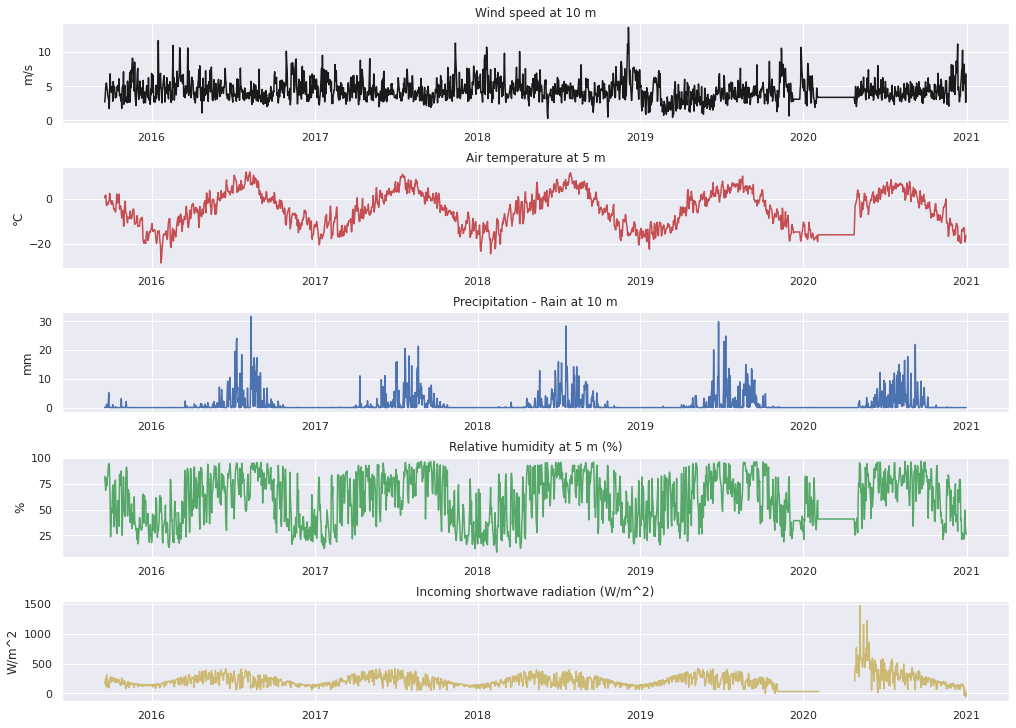

In [29]:
fig2 = plt.figure(figsize=(14,10), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=5, figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])

f2_ax1.set_title('Wind speed at 10 m')
f2_ax1.plot(data_AWS_syn['Wind speed at 10 m (m/s)'],'k', label='Wind speed at 10 m (m/s)')
f2_ax1.set_ylabel('m/s')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax1.grid(True)

f2_ax2.set_title('Air temperature at 5 m')
f2_ax2.plot(data_AWS_syn['Air temperature at 5 m (°C)'], 'r',label='Air temperature at 5 m (°C)')
f2_ax2.set_ylabel('°C')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax2.grid(True)

f2_ax3.set_title('Precipitation - Rain at 10 m')
f2_ax3.plot(data_AWS_prep_dailysum, 'b',label='Precipitation at 10 m (mm)')
f2_ax3.set_ylabel('mm')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax3.grid(True)

f2_ax4.set_title('Relative humidity at 5 m (%)')
f2_ax4.plot(data_AWS_syn['Relative humidity at 5 m (%)'], 'g',label='Relative humidity at 5 m (%)')
f2_ax4.set_ylabel('%')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax4.grid(True)

f2_ax5.set_title('Incoming shortwave radiation (W/m^2)')
f2_ax5.plot(data_AWS_syn['Incoming shortwave radiation (W/m^2)'], 'y',label='Incoming shortwave radiation (W/m^2)')
f2_ax5.set_ylabel('W/m^2')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax5.grid(True)


In [30]:
data_AWS_syn.describe()

Wind speed at 10 m (m/s)  Wind direction at 10 m (°)  \
count               1930.000000                 1929.000000   
mean                   4.361025                  150.264459   
std                    1.565687                   81.143994   
min                    0.280000                    0.000000   
25%                    3.368000                   97.629097   
50%                    4.078135                  161.750352   
75%                    5.114575                  206.533312   
max                   13.608847                  303.400000   

       Air temperature at 5 m (°C)  Relative humidity at 5 m (%)  \
count                  1932.000000                   1932.000000   
mean                     -5.298477                     59.387797   
std                       8.003990                     23.037716   
min                     -28.476389                      8.793979   
25%                     -12.180116                     40.251910   
50%                      -5.137122                     60.348542   
75%                       1.390510                     79.863142   
max                      11.823174                     96.875000   

       Precipitation at 10 m (mm)  Air pressure (hPa)  \
count                 1932.000000         1932.000000   
mean                     0.008359          613.017495   
std                      0.022512            4.819749   
min                      0.000000          600.808333   
25%                      0.000000          609.357813   
50%                      0.000000          614.137153   
75%                      0.002778          617.100000   
max                      0.219444          622.882639   

       Infrared temperature (°C)  Infrared temperature (°C)     PAR_down  \
count                1932.000000                1932.000000  1932.000000   
mean                   -6.080640                  -6.364456    39.175315   
std                    10.437266                   9.790861    16.079437   
min                   -29.598889                 -29.090903     8.936646   
25%                   -15.479304                 -15.221509    25.791026   
50%                    -6.852424                  -6.184691    36.332374   
75%                     3.141073                   1.708943    50.437967   
max                    18.081250                  16.090000    99.300000   

            PAR_up  Incoming shortwave radiation (W/m^2)  \
count  1932.000000                           1852.000000   
mean     18.934304                            210.194357   
std      17.747199                            116.062383   
min       0.628153                            -56.094861   
25%       3.855776                            141.222944   
50%      13.667524                            193.328806   
75%      28.941639                            269.000789   
max      67.282264                           1471.012034   

       Outgoing shortwave radiation (W/m^2)  \
count                           1932.000000   
mean                             102.248858   
std                               79.722498   
min                                7.286694   
25%                               41.789979   
50%                               75.835031   
75%                              139.194151   
max                              348.573819   

       Incoming longwave radiation (W/m^2)  \
count                          1932.000000   
mean                            220.833211   
std                              64.570972   
min                             105.954861   
25%                             163.010243   
50%                             212.142361   
75%                             274.733507   
max                             370.592361   

       Outgoing longwave radiation (W/m^2)  Net radiation (W/m^2)  \
count                          1932.000000            1932.000000   
mean                            292.078537              24.364237   
std                              49.1880

Comments:
* The time period from '2019-12-12':'2019-12-24' and '2020-02':'2020-05' - Should be disregarded since the same values cannot occur at continous time periods
1. Wind speed at 10 m [m/s]
    * Wind speeds vary from 0 : 10.68 m/s with a mean of 3.793 m/s - That seems possible!
    * There is considerable variation - seems plausible.
    * Any chances of seasonality affects? - Westerlies during the winter and Indian Summer Monsoon during the summer.
2. Air temperature at 5 m [°C]
    * Varies from -22.37°C : 9.97°C with a mean of -5°C. - Very cold region!
    * The air temperature increases during the summer and decreases during the winter - Good!
    * Seasonality effects are clearly seen - Good! - Can probably be modelled!
3. Precipitation at 10 m [mm]
    * Variations are quite low! - Varies from 0 : 0.2 mm with a mean of 0.009 mm 
    * The precipitation mainly occurs during the indian summer monsoon period - from June : October
    * There might be more snow than rain
4. Relative humidity at 5 m [%]
    * Varies from 15%: 96% with a mean of 61% - Quite humid most of the time.
    * During precipitation - you see the RH increases - That's good!
    * I was also expecting that the relative humidity decreases with increase in air temperature - Not the case!
5. Air pressure at hPa
    * Varies from 600 - 622 hPa - Important to note while conducting Piezometer experiments!
    * Is this a normal value?

### Plotting the erroneous data - 
 - (a) '2019-12-12':'2019-12-24'
 - (b) '2020-02':'2020-05'

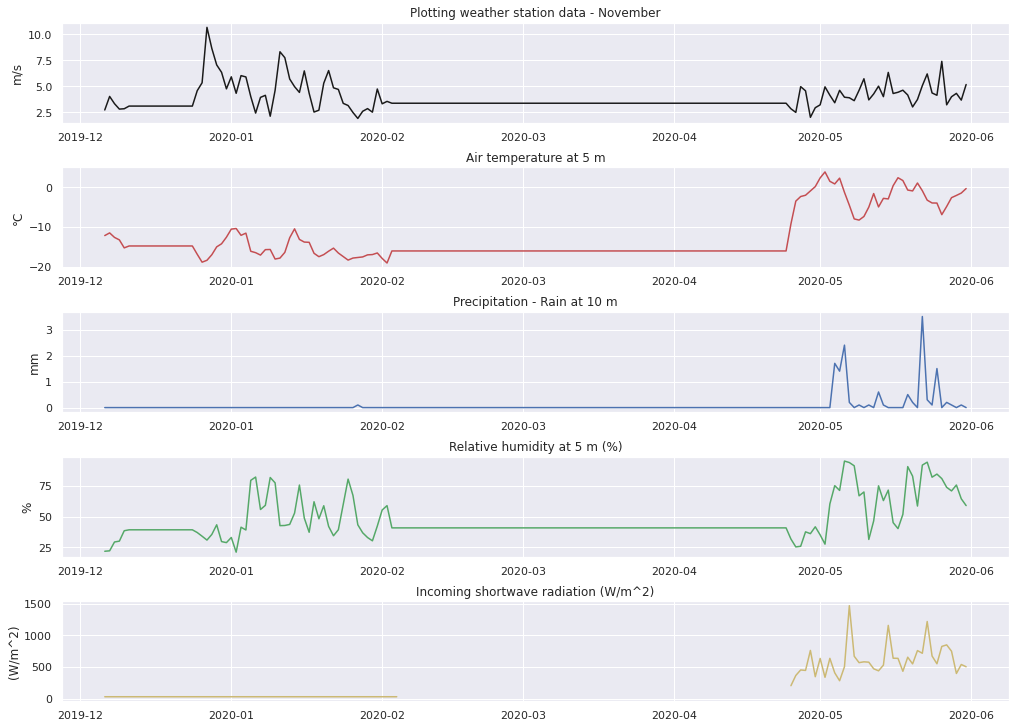

In [31]:
fig2 = plt.figure(figsize=(14,10), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=5, figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])

data_AWS_syn_plot = data_AWS_syn['2019-12-06':'2020-05']

f2_ax1.set_title('Plotting weather station data - November')
f2_ax1.plot(data_AWS_syn_plot['Wind speed at 10 m (m/s)'],'k', label='Wind speed at 10 m (m/s)')
f2_ax1.set_ylabel('m/s')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax1.grid(True)

f2_ax2.set_title('Air temperature at 5 m')
f2_ax2.plot(data_AWS_syn_plot['Air temperature at 5 m (°C)'], 'r',label='Air temperature at 5 m (°C)')
f2_ax2.set_ylabel('°C')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax2.grid(True)

f2_ax3.set_title('Precipitation - Rain at 10 m')
f2_ax3.plot(data_AWS_prep_dailysum['2019-12-06':'2020-05'], 'b',label='Precipitation at 10 m (mm)')
f2_ax3.set_ylabel('mm')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax3.grid(True)

f2_ax4.set_title('Relative humidity at 5 m (%)')
f2_ax4.plot(data_AWS_syn_plot['Relative humidity at 5 m (%)'], 'g',label='Relative humidity at 5 m (%)')
f2_ax4.set_ylabel('%')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax4.grid(True)

f2_ax5.set_title('Incoming shortwave radiation (W/m^2)')
f2_ax5.plot(data_AWS_syn_plot['Incoming shortwave radiation (W/m^2)'], 'y',label='Incoming shortwave radiation (W/m^2)')
f2_ax5.set_ylabel('(W/m^2)')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax5.grid(True)

In [32]:
data_AWS_syn['Incoming shortwave radiation (W/m^2)'].index[np.where(np.isnan(data_AWS_syn['Incoming shortwave radiation (W/m^2)']))[0]]

DatetimeIndex(['2020-02-05', '2020-02-06', '2020-02-07', '2020-02-08',
               '2020-02-09', '2020-02-10', '2020-02-11', '2020-02-12',
               '2020-02-13', '2020-02-14', '2020-02-15', '2020-02-16',
               '2020-02-17', '2020-02-18', '2020-02-19', '2020-02-20',
               '2020-02-21', '2020-02-22', '2020-02-23', '2020-02-24',
               '2020-02-25', '2020-02-26', '2020-02-27', '2020-02-28',
               '2020-02-29', '2020-03-01', '2020-03-02', '2020-03-03',
               '2020-03-04', '2020-03-05', '2020-03-06', '2020-03-07',
               '2020-03-08', '2020-03-09', '2020-03-10', '2020-03-11',
               '2020-03-12', '2020-03-13', '2020-03-14', '2020-03-15',
               '2020-03-16', '2020-03-17', '2020-03-18', '2020-03-19',
               '2020-03-20', '2020-03-21', '2020-03-22', '2020-03-23',
               '2020-03-24', '2020-03-25', '2020-03-26', '2020-03-27',
               '2020-03-28', '2020-03-29', '2020-03-30', '2020-03-31',
      

### Finding  erroneous data:
* Found two time periods where some the parameters are constant - not possible!
 - (a) '2019-12-12':'2019-12-24'
 - (b) '2020-02':'2020-05'
 - (c) '2019-12-12':'2020-02-05' - For only shortwave radiation
 
* If we are considering to use this dataset, We need to find efficient ways of dealing with erroneous data. To my knowledge, we can consider:
    - (a) Replacing the values with previous year data (Quick-fix)
    - (b) Modelling the datasets using data-driven techniques (Winter-Holt's method, ARIMA, SARIMA, ...etc.)
    - Research more!!

In [33]:
data_AWS_syn['2019-12-10':'2019-12-25'].head()

Wind speed at 10 m (m/s)  Wind direction at 10 m (°)  \
TIMESTAMP                                                          
2019-12-10                  2.836722                  224.922222   
2019-12-11                  3.093000                  226.100000   
2019-12-12                  3.093000                  226.100000   
2019-12-13                  3.093000                  226.100000   
2019-12-14                  3.093000                  226.100000   

            Air temperature at 5 m (°C)  Relative humidity at 5 m (%)  \
TIMESTAMP                                                               
2019-12-10                   -15.226528                     38.553889   
2019-12-11                   -14.750000                     39.310000   
2019-12-12                   -14.750000                     39.310000   
2019-12-13                   -14.750000                     39.310000   
2019-12-14                   -14.750000                     39.310000   

            Precipitation at 10 m (mm)  Air pressure (hPa)  \
TIMESTAMP                                                    
2019-12-10                         0.0          609.759028   
2019-12-11                         0.0          609.800000   
2019-12-12                         0.0          609.800000   
2019-12-13                         0.0          609.800000   
2019-12-14                         0.0          609.800000   

            Infrared temperature (°C)  Infrared temperature (°C)   PAR_down  \
TIMESTAMP                                                                     
2019-12-10                 -21.289861                 -19.852708  41.057757   
2019-12-11                 -17.950000                 -15.940000  68.850000   
2019-12-12                 -17.950000                 -15.940000  68.850000   
2019-12-13                 -17.950000                 -15.940000  68.850000   
2019-12-14                 -17.950000                 -15.940000  68.850000   

               PAR_up  Incoming shortwave radiation (W/m^2)  \
TIMESTAMP                                                     
2019-12-10  30.984771                                 31.23   
2019-12-11  52.080000                                 31.23   
2019-12-12  52.080000                                 31.23   
2019-12-13  52.080000                                 31.23   
2019-12-14  52.080000                                 31.23   

            Outgoing shortwave radiation (W/m^2)  \
TIMESTAMP                                          
2019-12-10                            159.600403   
2019-12-11                            265.500000   
2019-12-12                            265.500000   
2019-12-13                            265.500000   
2019-12-14                            265.500000   

            Incoming longwave radiation (W/m^2)  \
TIMESTAMP                                         
2019-12-10                           145.679167   
2019-12-11                           145.700000   
2019-12-12                           145.700000   
2019-12-13                           145.700000   
2019-12-14                           145.700000   

            Outgoing longwave radiation (W/m^2)  Net radiation (W/m^2)  \
TIMESTAMP                                                                
2019-12-10                           228.638889                  -96.9   
2019-12-11                           238.700000                  -96.9   
2019-12-12                           238.700000                  -96.9   
2019-12-13                           238.700000                  -96.9   
2019-12-14                           238.700000                  -96.9   

            Soil heat flux at - 0.06 m (W/m^2) - 1  \
TIMESTAMP                                            
2019-12-10                              -17.091806   
2019-12-11                              -17.760000   
2019-12-12                              -17.760000   
2019-12-13                              -17.760000   
2019-12-14                

### Plotting Radiation parameters - Incoming and outgoing longwave and shortwave radiation, Net Radiation [W/m^2]

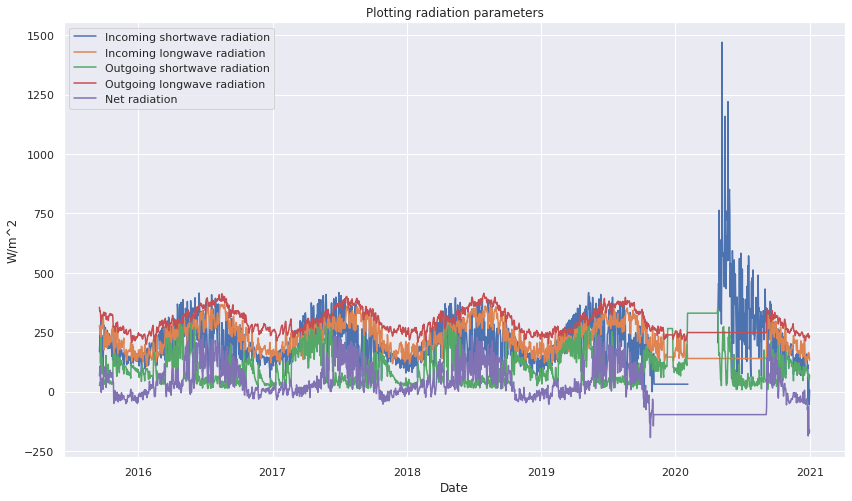

In [34]:
plt.figure(figsize=(14,8))
plt.title('Plotting radiation parameters')
plt.plot(data_AWS_syn['Incoming shortwave radiation (W/m^2)'],label='Incoming shortwave radiation')
plt.plot(data_AWS_syn['Incoming longwave radiation (W/m^2)'],label='Incoming longwave radiation')
plt.plot(data_AWS_syn['Outgoing shortwave radiation (W/m^2)'],label='Outgoing shortwave radiation')
plt.plot(data_AWS_syn['Outgoing longwave radiation (W/m^2)'],label='Outgoing longwave radiation')
plt.plot(data_AWS_syn['Net radiation (W/m^2)'],label='Net radiation')
plt.ylabel('W/m^2')
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.xlabel('Date')
plt.legend()
plt.grid(True)

### Comments:
    - The dataset for the year 2020 seems to be erroneous - mainly the incoming and out going shortwave radiation, net radiation, and outgoing longwave radiation. Check in detail!

In [35]:
data_AWS_syn['Net_radiation_calc'] = data_AWS_syn['Incoming shortwave radiation (W/m^2)'] - data_AWS_syn['Outgoing shortwave radiation (W/m^2)'] + data_AWS_syn['Incoming longwave radiation (W/m^2)'] - data_AWS_syn['Outgoing longwave radiation (W/m^2)']

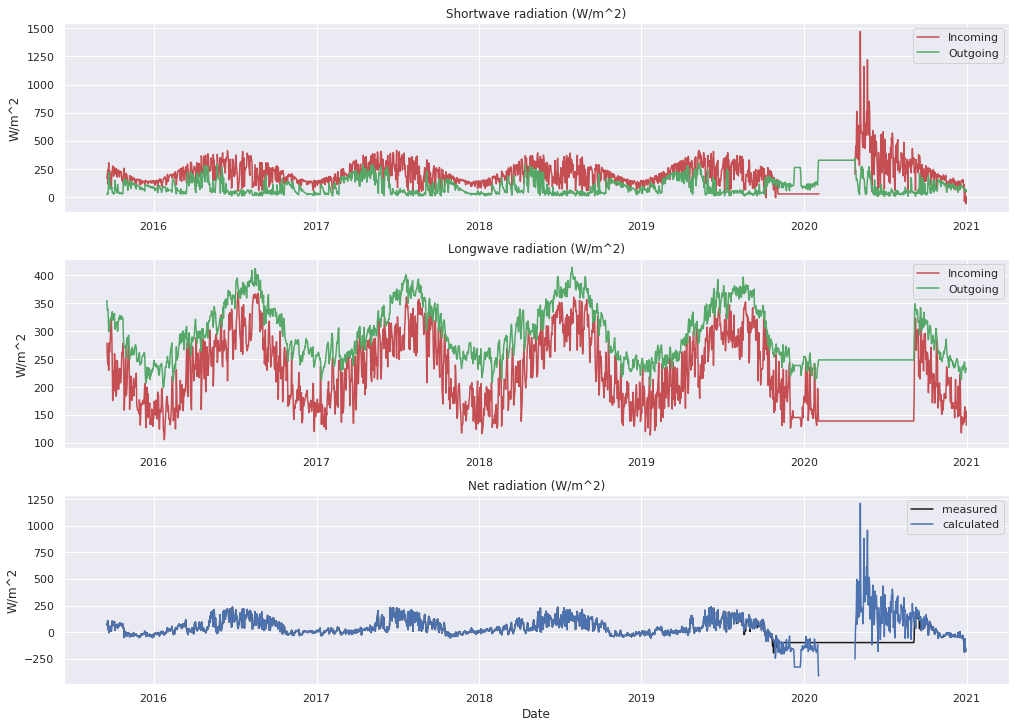

In [36]:
fig2 = plt.figure(figsize=(14,10), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=3, figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])



f2_ax1.set_title('Shortwave radiation (W/m^2)')
f2_ax1.plot(data_AWS_syn['Incoming shortwave radiation (W/m^2)'],'r', label='Incoming')
f2_ax1.plot(data_AWS_syn['Outgoing shortwave radiation (W/m^2)'],'g', label='Outgoing')
f2_ax1.set_ylabel('W/m^2')
#f2_ax1.set_xlabel('Date')
f2_ax1.legend()
f2_ax1.grid(True)

f2_ax2.set_title('Longwave radiation (W/m^2)')
f2_ax2.plot(data_AWS_syn['Incoming longwave radiation (W/m^2)'], 'r',label='Incoming')
f2_ax2.plot(data_AWS_syn['Outgoing longwave radiation (W/m^2)'], 'g',label='Outgoing')
f2_ax2.set_ylabel('W/m^2')
#f2_ax1.set_xlabel('Date')
f2_ax2.legend()
f2_ax2.grid(True)

f2_ax3.set_title('Net radiation (W/m^2)')
f2_ax3.plot(data_AWS_syn['Net radiation (W/m^2)'], 'k', label='measured')
f2_ax3.plot(data_AWS_syn['Net_radiation_calc'], 'b', label='calculated')
f2_ax3.set_ylabel('W/m^2')
f2_ax3.set_xlabel('Date')
f2_ax3.legend()
f2_ax3.grid(True)


### Calculation the albedo value:
$$\alpha = 1 - \frac{SW_{out}}{SW_{in}}$$

<ipython-input-37-3faf269537c4>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  data_AWS_syn_2017_a = data_AWS_syn['2017'].copy()


<AxesSubplot:xlabel='TIMESTAMP'>

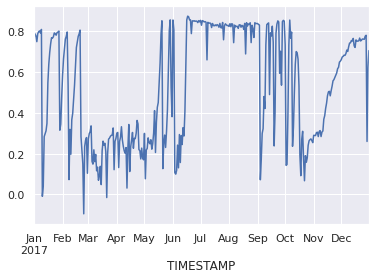

In [37]:
data_AWS_syn_2017_a = data_AWS_syn['2017'].copy()
data_AWS_syn_2017_a['albedo [-]'] = 1 - data_AWS_syn_2017_a['Outgoing shortwave radiation (W/m^2)']/data_AWS_syn_2017_a['Incoming shortwave radiation (W/m^2)']
data_AWS_syn_2017_a['albedo [-]'].plot()

In [38]:
data_AWS_syn[['Incoming shortwave radiation (W/m^2)','Outgoing shortwave radiation (W/m^2)','Incoming longwave radiation (W/m^2)','Outgoing longwave radiation (W/m^2)','Net radiation (W/m^2)','Net_radiation_calc']].describe()

Incoming shortwave radiation (W/m^2)  \
count                           1852.000000   
mean                             210.194357   
std                              116.062383   
min                              -56.094861   
25%                              141.222944   
50%                              193.328806   
75%                              269.000789   
max                             1471.012034   

       Outgoing shortwave radiation (W/m^2)  \
count                           1932.000000   
mean                             102.248858   
std                               79.722498   
min                                7.286694   
25%                               41.789979   
50%                               75.835031   
75%                              139.194151   
max                              348.573819   

       Incoming longwave radiation (W/m^2)  \
count                          1932.000000   
mean                            220.833211   
std                              64.570972   
min                             105.954861   
25%                             163.010243   
50%                             212.142361   
75%                             274.733507   
max                             370.592361   

       Outgoing longwave radiation (W/m^2)  Net radiation (W/m^2)  \
count                          1932.000000            1932.000000   
mean                            292.078537              24.364237   
std                              49.188007              82.903297   
min                             199.021528            -193.412417   
25%                             248.600000             -25.194375   
50%                             278.910764              14.862934   
75%                             331.282986              78.574293   
max                             413.986111             239.133924   

       Net_radiation_calc  
count         1852.000000  
mean            48.186386  
std            109.410212  
min           -408.170000  
25%             -8.014470  
50%             28.342073  
75%            104.578997  
max           1212.433395

### Erroneous data

### Plotting the 2020 dataset

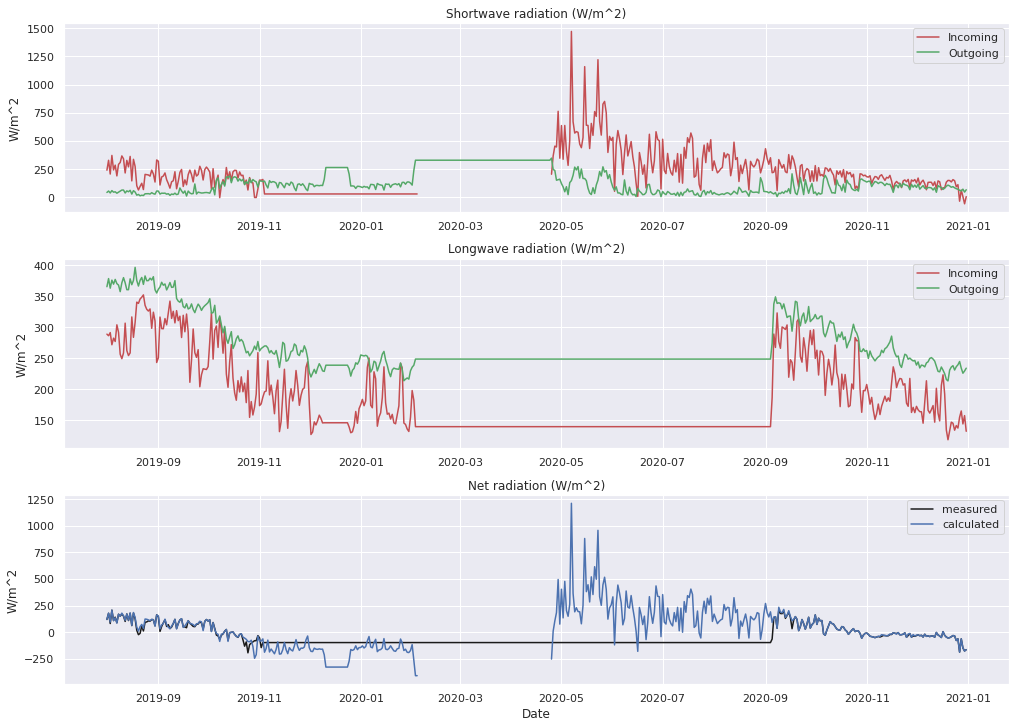

In [39]:
fig2 = plt.figure(figsize=(14,10), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=3, figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])



f2_ax1.set_title('Shortwave radiation (W/m^2)')
f2_ax1.plot(data_AWS_syn['2019-08':]['Incoming shortwave radiation (W/m^2)'],'r', label='Incoming')
f2_ax1.plot(data_AWS_syn['2019-08':]['Outgoing shortwave radiation (W/m^2)'],'g', label='Outgoing')
f2_ax1.set_ylabel('W/m^2')
#f2_ax1.set_xlabel('Date')
f2_ax1.legend()
f2_ax1.grid(True)

f2_ax2.set_title('Longwave radiation (W/m^2)')
f2_ax2.plot(data_AWS_syn['2019-08':]['Incoming longwave radiation (W/m^2)'], 'r',label='Incoming')
f2_ax2.plot(data_AWS_syn['2019-08':]['Outgoing longwave radiation (W/m^2)'], 'g',label='Outgoing')
f2_ax2.set_ylabel('W/m^2')
#f2_ax1.set_xlabel('Date')
f2_ax2.legend()
f2_ax2.grid(True)

f2_ax3.set_title('Net radiation (W/m^2)')
f2_ax3.plot(data_AWS_syn['2019-08':]['Net radiation (W/m^2)'], 'k', label='measured')
f2_ax3.plot(data_AWS_syn['2019-08':]['Net_radiation_calc'], 'b', label='calculated')
f2_ax3.set_ylabel('W/m^2')
f2_ax3.set_xlabel('Date')
f2_ax3.legend()
f2_ax3.grid(True)

### Comments:
    - Incoming shortwave radiation: Constant and missing values from 2019-11 : 2020-05. They also have very high values from 2020-05 onwards. 
    - Outgoing shortwave radiation: Constant values around 2019-12 and early months of 2020
    - Incoming and outgoing longwave radiation have also a constant value for a longer period of time [2020-02 : 2020-09]
    - The measured net radiation values are constant for a longer period of time from 2019-11 : 2020-09

A good strategy needs to be laid out to deal with these erroneous or missing values if we consider using the dataset

Comments:
* The incoming shortwave radiation (W/m^2) has constant values from '2019-11-03' : '2019-12-31' - hence the dataset cannot be used! - Do we consider modelling the incoming shortwave radiation by back calculating it with outgoing shortwave radiation?
* Can outgoing radiation be greater than the incoming radiation? - I think it can, since heat can be stored and released at a later time?
* The values seems to be in general varying from [0 - 400 W/m^2] - That's okay!
* Most of the cases - Outgoing shortwave radiation < Incoming shortwave radiation - At time periods from 2019-10-01 it is false
* All time periods Outgoing longwave radiation > Incoming longwave radiation
* The measured and calculated net radiation values are mostly similar - Only at some time periods, they are not. The measured values cannot be considered from '2019-11-03' : '2019-12-31'
* The outgoing shortwave radiation [W/m^2] after '2019-12' - has a sudden increase - discard these values or find a replacement.


### Plotting Soil heat flux [W/m^2]

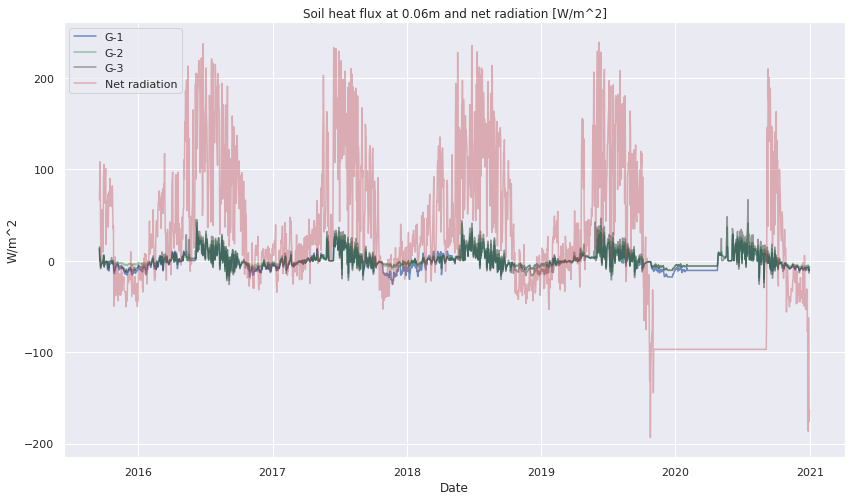

In [75]:
plt.figure(figsize=(14,8))
plt.title('Soil heat flux at 0.06m and net radiation [W/m^2]')
plt.plot(data_AWS_syn['Soil heat flux at - 0.06 m (W/m^2) - 1'],'b',alpha=0.8,label='G-1')
plt.plot(data_AWS_syn['Soil heat flux at - 0.06 m (W/m^2) - 2'],'g',alpha=0.6,label='G-2')
plt.plot(data_AWS_syn['Soil heat flux at - 0.06 m (W/m^2) - 3'],'k',alpha=0.4,label='G-3')
plt.plot(data_AWS_syn['Net radiation (W/m^2)'],'r',alpha=0.4,label='Net radiation')

plt.ylabel('W/m^2')
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.xlabel('Date')
plt.legend()
plt.grid(True)

In [76]:
data_AWS_syn[['Soil heat flux at - 0.06 m (W/m^2) - 1','Soil heat flux at - 0.06 m (W/m^2) - 2','Soil heat flux at - 0.06 m (W/m^2) - 3']].describe()

Soil heat flux at - 0.06 m (W/m^2) - 1  \
count                             1932.000000   
mean                                -0.889387   
std                                  9.049819   
min                                -25.847118   
25%                                 -7.447281   
50%                                 -1.605427   
75%                                  3.886505   
max                                 36.631549   

       Soil heat flux at - 0.06 m (W/m^2) - 2  \
count                             1932.000000   
mean                                 1.140762   
std                                  8.670412   
min                                -23.856250   
25%                                 -4.857196   
50%                                 -1.110007   
75%                                  3.835682   
max                                 42.019160   

       Soil heat flux at - 0.06 m (W/m^2) - 3  
count                             1932.000000  
mean                                 1.080090  
std                                 10.913594  
min                                -29.374028  
25%                                 -5.794000  
50%                                 -1.221910  
75%                                  5.078771  
max                                 66.850000

Comments:

1. G-1, G-2 and G-3 sensors are all reading very similar sensor values.
    
2. The variations of net radiation seem to correspond to the variations of soil heat flux sensors.

### Plotting soil moisture at different depths 

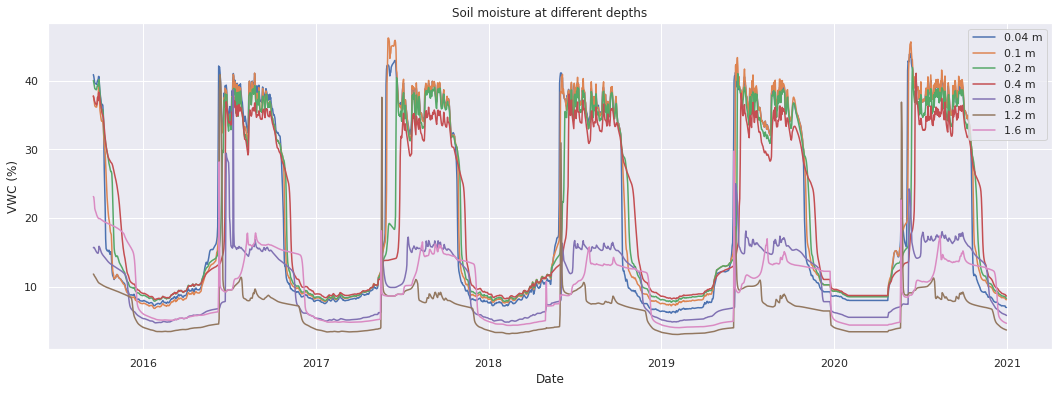

In [77]:
plt.figure(figsize=(18,6))
plt.title('Soil moisture at different depths')
plt.plot(data_AWS_syn['Soil moisture at - 0.04 m (%)'], label='0.04 m')
plt.plot(data_AWS_syn['Soil moisture at - 0.1 m (%)'], label='0.1 m')
plt.plot(data_AWS_syn['Soil moisture at - 0.2 m (%)'], label='0.2 m')
plt.plot(data_AWS_syn['Soil moisture at - 0.4 m (%)'], label='0.4 m')
plt.plot(data_AWS_syn['Soil moisture at - 0.8 m (%)'], label='0.8 m')
plt.plot(data_AWS_syn['Soil moisture at - 1.2 m (%)'], label='1.2 m')
plt.plot(data_AWS_syn['Soil moisture at - 1.6 m (%)'], label='1.6 m')


plt.ylabel('VWC (%)')
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.xlabel('Date')
plt.legend()
plt.grid(True)

Comments:
1. Soil moisture decreases with depth - Good!
2. Soil moisture sensors at 0.04 m, 0.1 m, 0.2 m & 0.4 m have similar moisture contents [during the monsoon period] and also higher soil moisture content than at 0.8 m, 1.2 m and 1.6 m. 
3. There seems to be a grouping of soil moisture sensors at 0.04 m, 0.1 m, 0.2 m & 0.4 m  & 0.8 m, 1.2 m and 1.6 m - There probably exist two different layers of soil? - Similar pattern seen at up-slope, middle-slope and riparian zone.
4. Soil moisture content increases during the indian summer monsoons [2019-06 to 2019-11] - Plot it with precipitation?
5. How to identify if soil is frozen? - Seems to be a constant moisture content during the winter period.
6. On observing the yearly trend, the soil moisture content values have more or less similar trends.

### Plotting soil temperature at different depths

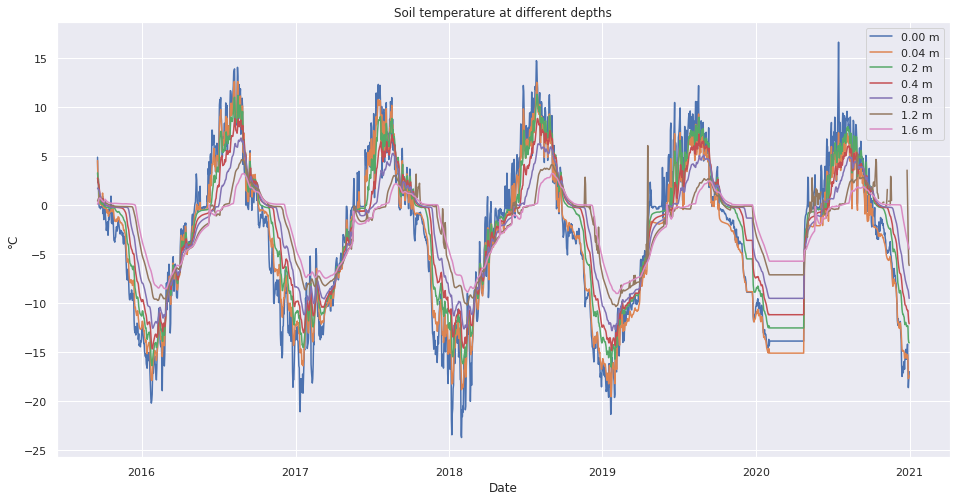

In [78]:
plt.figure(figsize=(16,8))
plt.title('Soil temperature at different depths')
#plt.plot(data_AWS_syn['Air temperature at 5 m (°C)'], label='Air temperature at 5 m')
plt.plot(data_AWS_syn['Soil temperature at - 0.00 m (°C)'], label='0.00 m')
plt.plot(data_AWS_syn['Soil temperature at - 0.04 m (°C)'], label='0.04 m')
plt.plot(data_AWS_syn['Soil temperature at - 0.2 m (°C)'], label='0.2 m')
plt.plot(data_AWS_syn['Soil temperature at - 0.4 m (°C)'], label='0.4 m')
plt.plot(data_AWS_syn['Soil temperature at - 0.8 m (°C)'], label='0.8 m')
plt.plot(data_AWS_syn['Soil temperature at - 1.2 m (°C)'], label='1.2 m')
plt.plot(data_AWS_syn['Soil temperature at - 1.6 m (°C)'], label='1.6 m')
plt.ylabel('°C')
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('°Cm-°Cd'))
plt.xlabel('Date')
plt.legend()
plt.grid(True)

Comments:
1. In the winter the surface is cooler than the subsurface (soil at greater depths) & in the summer, the subsurface is cooler than the surface - Good! 
2. The temperature values increases during the summer and decreases during the winter good!
3. The variations of subsurface temperature decreases with depth.
4. On observing the yearly trend, the temperature variations along different depths seem to be similar.
5. The values are constant somewhere around the early 2020s - Missing data? Take a closer look!

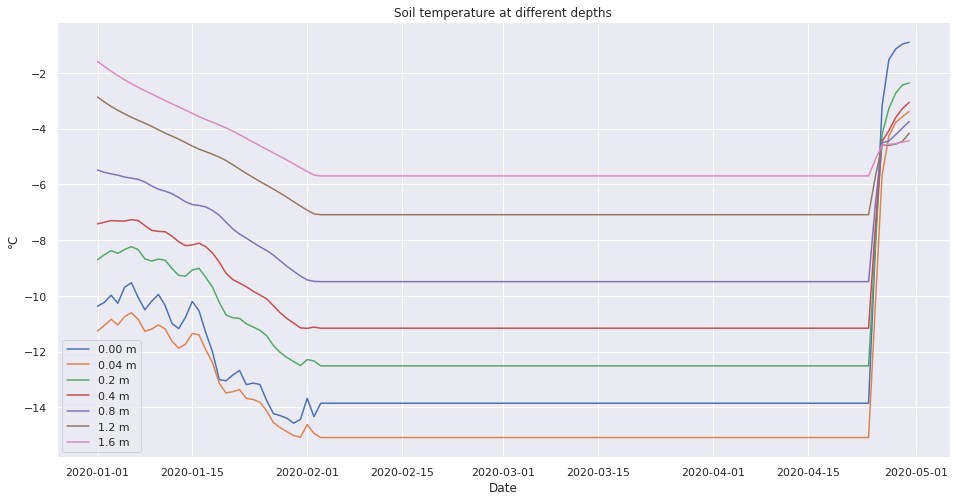

In [79]:
plt.figure(figsize=(16,8))
plt.title('Soil temperature at different depths')
#plt.plot(data_AWS_syn['2020-01':'2020-04']['Air temperature at 5 m (°C)'], label='Air temperature at 5 m')
plt.plot(data_AWS_syn['2020-01':'2020-04']['Soil temperature at - 0.00 m (°C)'], label='0.00 m')
plt.plot(data_AWS_syn['2020-01':'2020-04']['Soil temperature at - 0.04 m (°C)'], label='0.04 m')
plt.plot(data_AWS_syn['2020-01':'2020-04']['Soil temperature at - 0.2 m (°C)'], label='0.2 m')
plt.plot(data_AWS_syn['2020-01':'2020-04']['Soil temperature at - 0.4 m (°C)'], label='0.4 m')
plt.plot(data_AWS_syn['2020-01':'2020-04']['Soil temperature at - 0.8 m (°C)'], label='0.8 m')
plt.plot(data_AWS_syn['2020-01':'2020-04']['Soil temperature at - 1.2 m (°C)'], label='1.2 m')
plt.plot(data_AWS_syn['2020-01':'2020-04']['Soil temperature at - 1.6 m (°C)'], label='1.6 m')
plt.ylabel('°C')
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('°Cm-°Cd'))
plt.xlabel('Date')
plt.legend()
plt.grid(True)

- Clearly constant temperature values approximately from 2020-02-01 : 2020-04-20 indicate erroneous data that cannot be considered.

In [80]:
data_AWS_syn['2020-02':'2020-02-15']['Soil temperature at - 0.00 m (°C)']

TIMESTAMP
2020-02-01   -13.673681
2020-02-02   -14.330709
2020-02-03   -13.850000
2020-02-04   -13.850000
2020-02-05   -13.850000
2020-02-06   -13.850000
2020-02-07   -13.850000
2020-02-08   -13.850000
2020-02-09   -13.850000
2020-02-10   -13.850000
2020-02-11   -13.850000
2020-02-12   -13.850000
2020-02-13   -13.850000
2020-02-14   -13.850000
2020-02-15   -13.850000
Freq: D, Name: Soil temperature at - 0.00 m (°C), dtype: float64

### Plotting parameters together:

Text(0, 0.5, '(mm)')

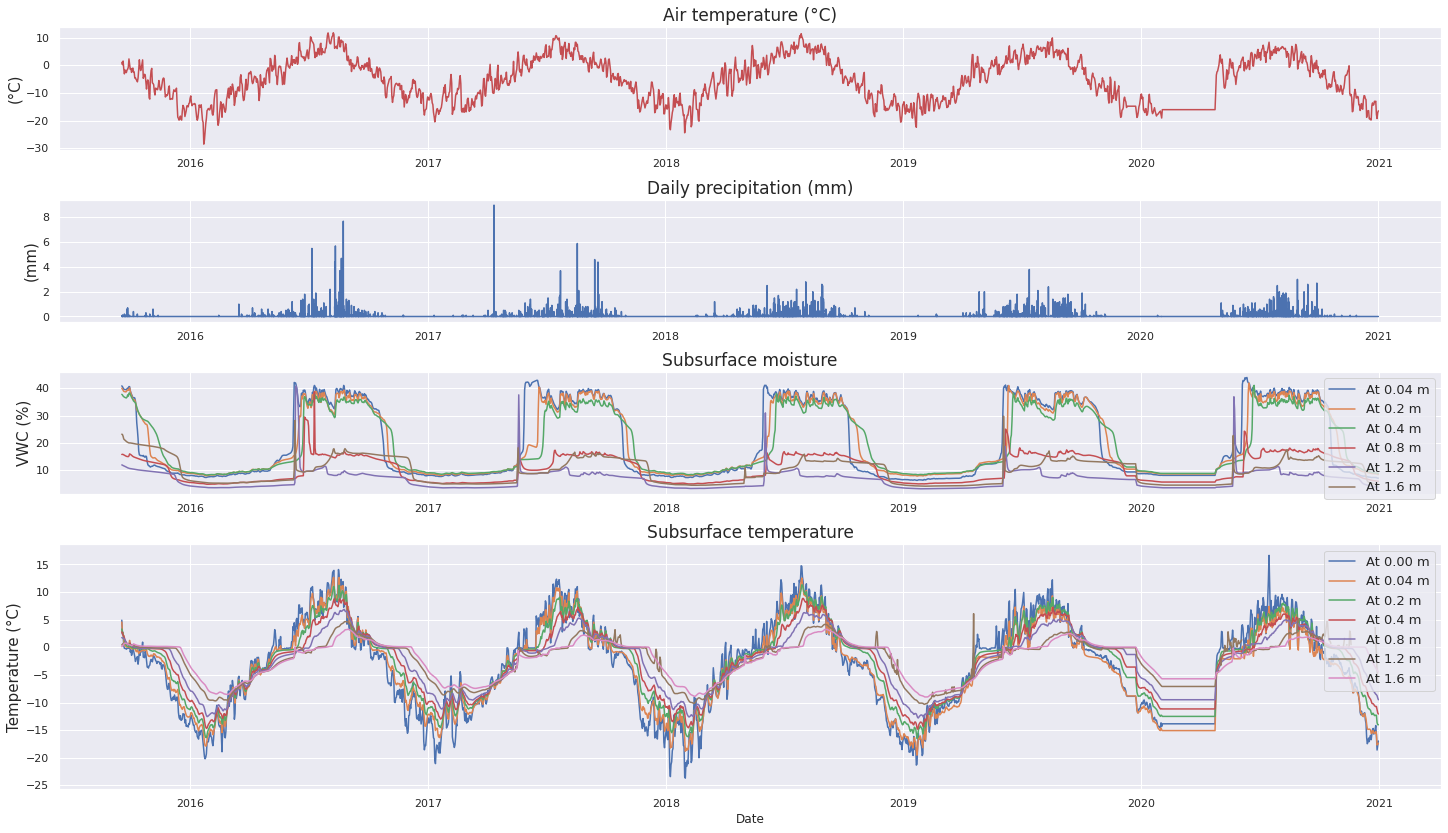

In [81]:
fig2 = plt.figure(figsize=(20,15), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=5, height_ratios=[1,1,1,2,2], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[2, 0])
f2_ax2 = fig2.add_subplot(spec2[3, 0])
f2_ax3 = fig2.add_subplot(spec2[0, 0])
f2_ax4 = fig2.add_subplot(spec2[1, 0])

#plt.title('Soil moisture data - Mean hourly values (linearly interpolated for missing values)')

f2_ax1.set_title('Subsurface moisture',fontsize=17)
f2_ax1.plot(data_AWS_syn['Soil moisture at - 0.04 m (%)'], label='At 0.04 m')
f2_ax1.plot(data_AWS_syn['Soil moisture at - 0.2 m (%)'], label='At 0.2 m')
f2_ax1.plot(data_AWS_syn['Soil moisture at - 0.4 m (%)'], label='At 0.4 m')
f2_ax1.plot(data_AWS_syn['Soil moisture at - 0.8 m (%)'], label='At 0.8 m')
f2_ax1.plot(data_AWS_syn['Soil moisture at - 1.2 m (%)'], label='At 1.2 m')
f2_ax1.plot(data_AWS_syn['Soil moisture at - 1.6 m (%)'], label='At 1.6 m')
f2_ax1.set_ylabel('VWC (%)',fontsize=15)
#f2_ax1.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
#f2_ax1.xlabel('Date')
f2_ax1.legend(loc=1,fontsize=13)
f2_ax1.grid(True)

f2_ax2.set_title('Subsurface temperature',fontsize=17)
f2_ax2.plot(data_AWS_syn['Soil temperature at - 0.00 m (°C)'], label='At 0.00 m')
f2_ax2.plot(data_AWS_syn['Soil temperature at - 0.04 m (°C)'], label='At 0.04 m')
f2_ax2.plot(data_AWS_syn['Soil temperature at - 0.2 m (°C)'], label='At 0.2 m')
f2_ax2.plot(data_AWS_syn['Soil temperature at - 0.4 m (°C)'], label='At 0.4 m')
f2_ax2.plot(data_AWS_syn['Soil temperature at - 0.8 m (°C)'], label='At 0.8 m')
f2_ax2.plot(data_AWS_syn['Soil temperature at - 1.2 m (°C)'], label='At 1.2 m')
f2_ax2.plot(data_AWS_syn['Soil temperature at - 1.6 m (°C)'], label='At 1.6 m')
f2_ax2.set_ylabel('Temperature (°C)',fontsize=15)
#f2_ax2.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
f2_ax2.set_xlabel('Date')
f2_ax2.legend(loc=1,fontsize=13)
f2_ax2.grid(True)

f2_ax3.set_title('Air temperature (°C)',fontsize=17)
f2_ax3.plot(data_AWS_syn['Air temperature at 5 m (°C)'],'r')
f2_ax3.set_ylabel('(°C)',fontsize=15)



f2_ax4.set_title('Daily precipitation (mm)',fontsize=17)
f2_ax4.plot(data_AWS_prep['Precipitation at 10 m (mm)'])
f2_ax4.set_ylabel('(mm)',fontsize=15)


#plt.savefig('met_data.png',dpi=300,bbox_inches='tight')

### Final comments:
- The datasets from 2016 - 2019 is considered for the analysis. 2020 - 2021 is not considered for the analysis since it contains missing data for nearly 3 months (2020-02 : 2020-05).
- From 2016 - 2018 is considered for calibration and 2018 - 2019 is considered for validation.


- The input data required for the model are: [at what elevation?]
1. incoming shortwave radiation [W m^-2]
2. air temperature [K]
3. relative humidity [-] [To vary from 0 - 1]
4. wind speed [m s^-1]
5. precipitation rain [m s^-1] - precipitation rain is required in [m s^-1]? We have mm/day - Check the outputs of thier dataset!
6. precipitation snow [m SWE s^-1]

In [82]:
### Changing relative humidity from 0 - 1 : Value/100

data_AWS_syn['Relative humidity at 5 m (%)'] = data_AWS_syn['Relative humidity at 5 m (%)']/100
data_AWS_syn.head()

Wind speed at 10 m (m/s)  Wind direction at 10 m (°)  \
TIMESTAMP                                                          
2015-09-18                  2.684574                  114.634559   
2015-09-19                  3.519660                  163.208056   
2015-09-20                  4.738181                  154.544444   
2015-09-21                  5.431181                  185.578819   
2015-09-22                  5.451313                  209.816667   

            Air temperature at 5 m (°C)  Relative humidity at 5 m (%)  \
TIMESTAMP                                                               
2015-09-18                     1.094662                      0.821641   
2015-09-19                     0.306757                      0.747226   
2015-09-20                     1.595799                      0.686345   
2015-09-21                    -1.113347                      0.805075   
2015-09-22                    -3.052653                      0.758280   

            Precipitation at 10 m (mm)  Air pressure (hPa)  \
TIMESTAMP                                                    
2015-09-18                    0.000000          619.273529   
2015-09-19                    0.001389          618.505556   
2015-09-20                    0.000000          615.268750   
2015-09-21                    0.000000          613.879861   
2015-09-22                    0.007639          615.256250   

            Infrared temperature (°C)  Infrared temperature (°C)   PAR_down  \
TIMESTAMP                                                                     
2015-09-18                   3.970647                   3.919662  31.643456   
2015-09-19                   1.592437                   1.588882  37.103757   
2015-09-20                   2.251285                   2.252646  44.286076   
2015-09-21                  -1.332889                  -1.232944  23.576875   
2015-09-22                  -5.638965                  -5.146229  52.365424   

               PAR_up  Incoming shortwave radiation (W/m^2)  \
TIMESTAMP                                                     
2015-09-18   3.086265                            167.931279   
2015-09-19   3.681437                            205.265104   
2015-09-20   3.668896                            247.032729   
2015-09-21   5.894063                            118.226840   
2015-09-22  46.383653                            307.433229   

            Outgoing shortwave radiation (W/m^2)  \
TIMESTAMP                                          
2015-09-18                             25.440926   
2015-09-19                             34.777674   
2015-09-20                             38.888910   
2015-09-21                             33.472118   
2015-09-22                            224.106951   

            Incoming longwave radiation (W/m^2)  \
TIMESTAMP                                         
2015-09-18                           278.705882   
2015-09-19                           254.429861   
2015-09-20                           239.675694   
2015-09-21                           269.340278   
2015-09-22                           229.918056   

            Outgoing longwave radiation (W/m^2)  Net radiation (W/m^2)  \
TIMESTAMP                                                                
2015-09-18                           354.627941              66.576000   
2015-09-19                           337.609722              87.303889   
2015-09-20                           339.564583             108.271861   
2015-09-21                           325.540278              28.548625   
2015-09-22                           299.250000              13.966069   

            Soil heat flux at - 0.06 m (W/m^2) - 1  \
TIMESTAMP                                            
2015-09-18                               13.179500   
2015-09-19                                0.321160   
2015-09-20                                2.008938   
2015-09-21                               -6.343875   
2015-09-22                

In [83]:
# Taking the data only from 2016 - 2020
data_AWS_syn_input = data_AWS_syn['2016':'2019'][['Incoming shortwave radiation (W/m^2)','Incoming longwave radiation (W/m^2)','Air temperature at 5 m (°C)','Relative humidity at 5 m (%)','Wind speed at 10 m (m/s)']]
data_AWS_syn_input['Precipitation-daily_sum (mm)'] = data_AWS_prep_dailysum['2016':'2019']
data_AWS_syn_input.head()

Incoming shortwave radiation (W/m^2)  \
TIMESTAMP                                          
2016-01-01                            147.702618   
2016-01-02                            140.529160   
2016-01-03                            135.256493   
2016-01-04                            107.868264   
2016-01-05                            148.488174   

            Incoming longwave radiation (W/m^2)  Air temperature at 5 m (°C)  \
TIMESTAMP                                                                      
2016-01-01                           143.619444                   -11.888438   
2016-01-02                           174.365278                   -11.031660   
2016-01-03                           172.479861                   -13.446111   
2016-01-04                           174.425694                   -14.566944   
2016-01-05                           150.390972                   -14.099236   

            Relative humidity at 5 m (%)  Wind speed at 10 m (m/s)  \
TIMESTAMP                                                            
2016-01-01                      0.181419                  6.880639   
2016-01-02                      0.243579                  5.634090   
2016-01-03                      0.456374                  4.129521   
2016-01-04                      0.434167                  6.604604   
2016-01-05                      0.298974                  4.566090   

            Precipitation-daily_sum (mm)  
TIMESTAMP                                 
2016-01-01                           0.0  
2016-01-02                           0.0  
2016-01-03                           0.0  
2016-01-04                           0.0  
2016-01-05                           0.0

* Comments:
    - Air temperature at 5 m, Precipitation (rain) at 10 m, and relative humidity all look plausible.
    - Wind speed has erroneous (constant) data close to the end of the year 2020!
    - Incoming shortwave radiation has a constant value from around 2019-11 : 2019-12-31

Take a closer look for missing values and erroneous data!

<ipython-input-84-d091078bf60b>:10: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  data_plot = data_AWS_syn_input['2019']


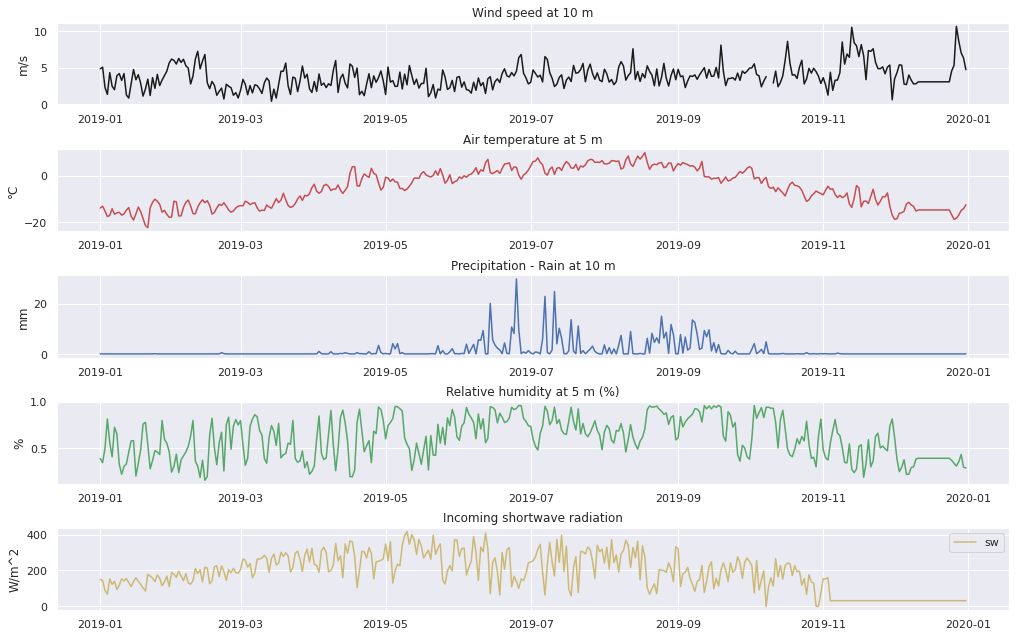

In [84]:
fig2 = plt.figure(figsize=(14,10), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=6, figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
#f2_ax6 = fig2.add_subplot(spec2[5, 0])

data_plot = data_AWS_syn_input['2019']

f2_ax1.set_title('Wind speed at 10 m')
f2_ax1.plot(data_plot['Wind speed at 10 m (m/s)'],'k', label='Wind speed at 10 m (m/s)')
f2_ax1.set_ylabel('m/s')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax1.grid(True)

f2_ax2.set_title('Air temperature at 5 m')
f2_ax2.plot(data_plot['Air temperature at 5 m (°C)'], 'r',label='Air temperature at 5 m (°C)')
f2_ax2.set_ylabel('°C')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax2.grid(True)

f2_ax3.set_title('Precipitation - Rain at 10 m')
f2_ax3.plot(data_plot['Precipitation-daily_sum (mm)'], 'b',label='Precipitation at 10 m (mm)')
f2_ax3.set_ylabel('mm')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax3.grid(True)

f2_ax4.set_title('Relative humidity at 5 m (%)')
f2_ax4.plot(data_plot['Relative humidity at 5 m (%)'], 'g',label='Relative humidity at 5 m (%)')
f2_ax4.set_ylabel('%')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax4.grid(True)

f2_ax5.set_title('Incoming shortwave radiation')
#f2_ax5.plot(data_AWS_syn_input['Incoming longwave radiation (W/m^2)'], 'k',label='lw')
f2_ax5.plot(data_plot['Incoming shortwave radiation (W/m^2)'], 'y',label='sw')
f2_ax5.set_ylabel('W/m^2')
#f2_ax1.set_xlabel('Date')
f2_ax5.legend()
f2_ax5.grid(True)

#f2_ax6.set_title('Snow depth (in m)')
#f2_ax6.plot(data_AWS_syn_input['Snow depth (in m)'], 'k',label='Snow depth (in m)')
#f2_ax6.set_ylabel('in m')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
#f2_ax6.grid(True)

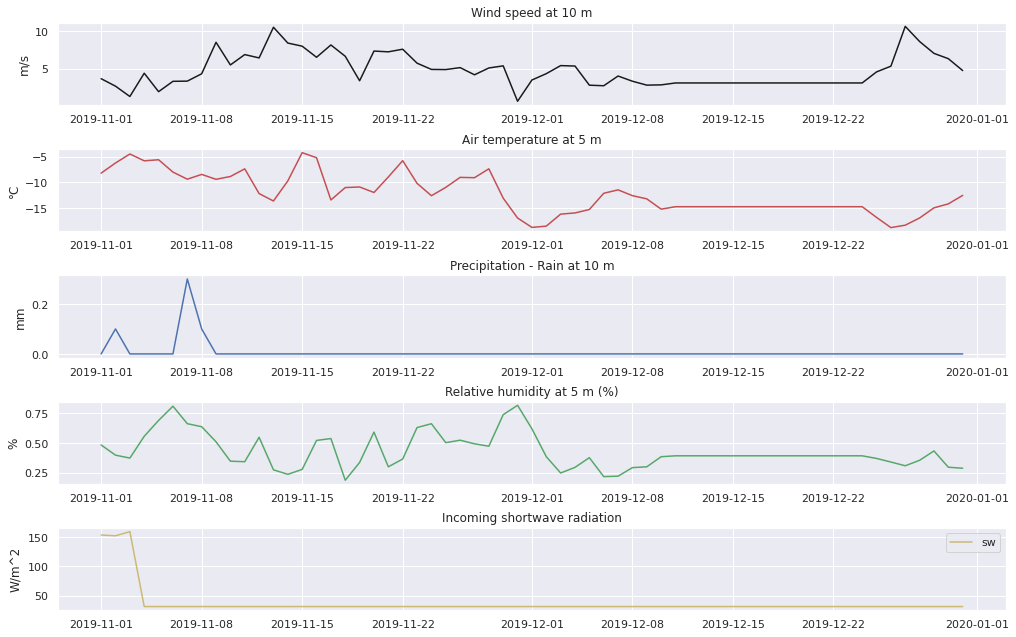

In [85]:
fig2 = plt.figure(figsize=(14,10), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=6, figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
#f2_ax6 = fig2.add_subplot(spec2[5, 0])

data_plot = data_AWS_syn_input['2019-11':'2019-12']

f2_ax1.set_title('Wind speed at 10 m')
f2_ax1.plot(data_plot['Wind speed at 10 m (m/s)'],'k', label='Wind speed at 10 m (m/s)')
f2_ax1.set_ylabel('m/s')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax1.grid(True)

f2_ax2.set_title('Air temperature at 5 m')
f2_ax2.plot(data_plot['Air temperature at 5 m (°C)'], 'r',label='Air temperature at 5 m (°C)')
f2_ax2.set_ylabel('°C')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax2.grid(True)

f2_ax3.set_title('Precipitation - Rain at 10 m')
f2_ax3.plot(data_plot['Precipitation-daily_sum (mm)'], 'b',label='Precipitation at 10 m (mm)')
f2_ax3.set_ylabel('mm')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax3.grid(True)

f2_ax4.set_title('Relative humidity at 5 m (%)')
f2_ax4.plot(data_plot['Relative humidity at 5 m (%)'], 'g',label='Relative humidity at 5 m (%)')
f2_ax4.set_ylabel('%')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax4.grid(True)

f2_ax5.set_title('Incoming shortwave radiation')
#f2_ax5.plot(data_AWS_syn_input['Incoming longwave radiation (W/m^2)'], 'k',label='lw')
f2_ax5.plot(data_plot['Incoming shortwave radiation (W/m^2)'], 'y',label='sw')
f2_ax5.set_ylabel('W/m^2')
#f2_ax1.set_xlabel('Date')
f2_ax5.legend()
f2_ax5.grid(True)

#f2_ax6.set_title('Snow depth (in m)')
#f2_ax6.plot(data_AWS_syn_input['Snow depth (in m)'], 'k',label='Snow depth (in m)')
#f2_ax6.set_ylabel('in m')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()

#### Comments:
* Found two time periods where the parameters are constant - not possible!
 - (a) '2019-12-12':'2019-12-24' - For wind speed at 10 m, air temperature at 5 m, relative humidity at 5 m
 - (b) '2019-11':'2020-01' - For incoming shortwave radiation 
 - Dealing with the erroneous (constant) data by replacing it with data from one year earlier

### How does the data from 2018 look like?

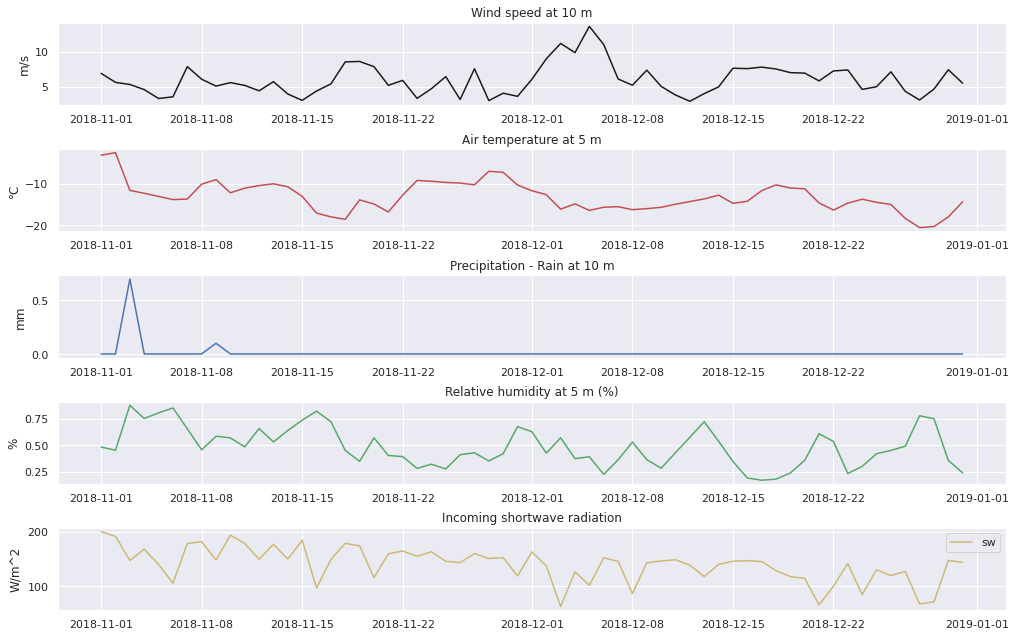

In [86]:
fig2 = plt.figure(figsize=(14,10), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=6, figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
#f2_ax6 = fig2.add_subplot(spec2[5, 0])

data_plot = data_AWS_syn_input['2018-11':'2018-12']

f2_ax1.set_title('Wind speed at 10 m')
f2_ax1.plot(data_plot['Wind speed at 10 m (m/s)'],'k', label='Wind speed at 10 m (m/s)')
f2_ax1.set_ylabel('m/s')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax1.grid(True)

f2_ax2.set_title('Air temperature at 5 m')
f2_ax2.plot(data_plot['Air temperature at 5 m (°C)'], 'r',label='Air temperature at 5 m (°C)')
f2_ax2.set_ylabel('°C')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax2.grid(True)

f2_ax3.set_title('Precipitation - Rain at 10 m')
f2_ax3.plot(data_plot['Precipitation-daily_sum (mm)'], 'b',label='Precipitation at 10 m (mm)')
f2_ax3.set_ylabel('mm')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax3.grid(True)

f2_ax4.set_title('Relative humidity at 5 m (%)')
f2_ax4.plot(data_plot['Relative humidity at 5 m (%)'], 'g',label='Relative humidity at 5 m (%)')
f2_ax4.set_ylabel('%')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax4.grid(True)

f2_ax5.set_title('Incoming shortwave radiation')
#f2_ax5.plot(data_AWS_syn_input['Incoming longwave radiation (W/m^2)'], 'k',label='lw')
f2_ax5.plot(data_plot['Incoming shortwave radiation (W/m^2)'], 'y',label='sw')
f2_ax5.set_ylabel('W/m^2')
#f2_ax1.set_xlabel('Date')
f2_ax5.legend()
f2_ax5.grid(True)

#f2_ax6.set_title('Snow depth (in m)')
#f2_ax6.plot(data_AWS_syn_input['Snow depth (in m)'], 'k',label='Snow depth (in m)')
#f2_ax6.set_ylabel('in m')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()

#### Plausible values are observed and can be considered to be replaced with erroneous data of 2020
- wind speed at 10 m, air temperature at 5 m, relative humidity at 5 m : The dataset is replaced from 12-12 : 12-24
- incoming shortwave radiation is replaced from 11-03 : 12-31

In [89]:
data_AWS_input_imputed = data_AWS_syn_input.copy()
# Wind speed at 10 m (m/s)
data_AWS_input_imputed['Wind speed at 10 m (m/s)']['2019-12-12':'2019-12-24'] = data_AWS_input_imputed['Wind speed at 10 m (m/s)']['2018-12-12':'2018-12-24']

# Air temperature at 5 m
data_AWS_input_imputed['Air temperature at 5 m (°C)']['2019-12-12':'2019-12-24'] = data_AWS_input_imputed['Air temperature at 5 m (°C)']['2018-12-12':'2018-12-24']

# Relative humidity at 5 m
data_AWS_input_imputed['Relative humidity at 5 m (%)']['2019-12-12':'2019-12-24'] = data_AWS_input_imputed['Relative humidity at 5 m (%)']['2018-12-12':'2018-12-24']

# Shortwave radiation
data_AWS_input_imputed['Incoming shortwave radiation (W/m^2)']['2019-11-02':'2019-12-31'] = data_AWS_input_imputed['Incoming shortwave radiation (W/m^2)']['2018-11-02':'2018-12-31']

#data_AWS_input_imputed[['Wind speed at 10 m (m/s)','Air temperature at 5 m (°C)','Relative humidity at 5 m (%)']]['2019-12-12':'2019-12-24'] = data_AWS_input_imputed[['Wind speed at 10 m (m/s)','Air temperature at 5 m (°C)','Relative humidity at 5 m (%)']]['2018-12-12':'2018-12-24'] 

### Data after imputing with the year 2018

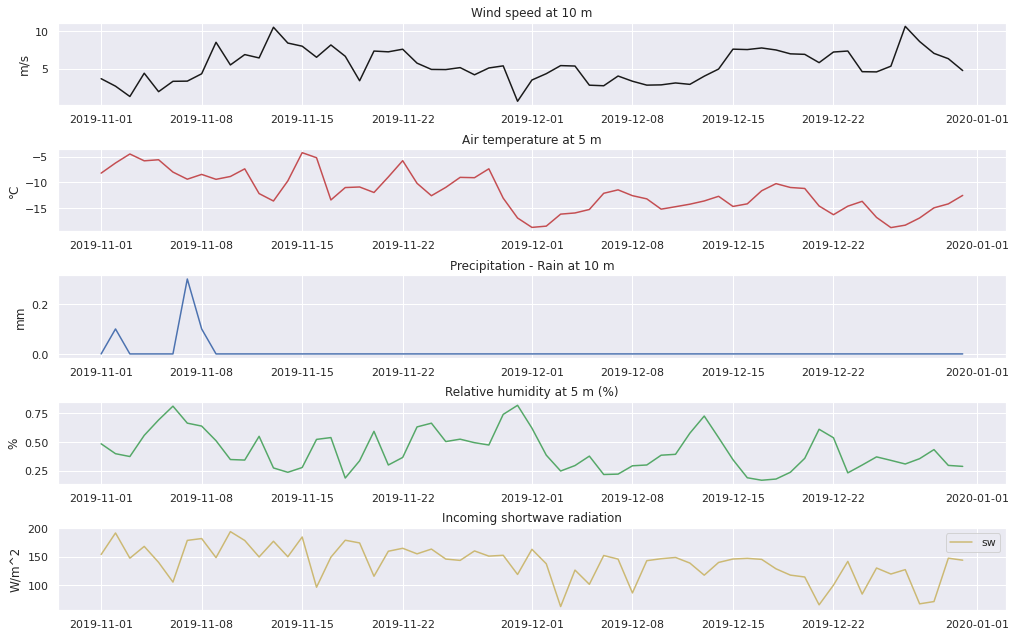

In [90]:
fig2 = plt.figure(figsize=(14,10), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=6, figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
#f2_ax6 = fig2.add_subplot(spec2[5, 0])

data_plot = data_AWS_input_imputed['2019-11':'2019-12']

f2_ax1.set_title('Wind speed at 10 m')
f2_ax1.plot(data_plot['Wind speed at 10 m (m/s)'],'k', label='Wind speed at 10 m (m/s)')
f2_ax1.set_ylabel('m/s')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax1.grid(True)

f2_ax2.set_title('Air temperature at 5 m')
f2_ax2.plot(data_plot['Air temperature at 5 m (°C)'], 'r',label='Air temperature at 5 m (°C)')
f2_ax2.set_ylabel('°C')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax2.grid(True)

f2_ax3.set_title('Precipitation - Rain at 10 m')
f2_ax3.plot(data_plot['Precipitation-daily_sum (mm)'], 'b',label='Precipitation at 10 m (mm)')
f2_ax3.set_ylabel('mm')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax3.grid(True)

f2_ax4.set_title('Relative humidity at 5 m (%)')
f2_ax4.plot(data_plot['Relative humidity at 5 m (%)'], 'g',label='Relative humidity at 5 m (%)')
f2_ax4.set_ylabel('%')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax4.grid(True)

f2_ax5.set_title('Incoming shortwave radiation')
#f2_ax5.plot(data_AWS_syn_input['Incoming longwave radiation (W/m^2)'], 'k',label='lw')
f2_ax5.plot(data_plot['Incoming shortwave radiation (W/m^2)'], 'y',label='sw')
f2_ax5.set_ylabel('W/m^2')
#f2_ax1.set_xlabel('Date')
f2_ax5.legend()
f2_ax5.grid(True)

#f2_ax6.set_title('Snow depth (in m)')
#f2_ax6.plot(data_AWS_syn_input['Snow depth (in m)'], 'k',label='Snow depth (in m)')
#f2_ax6.set_ylabel('in m')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()

### Looks good!

### Missing data

In [91]:
data_AWS_input_imputed.index[np.where(np.isnan(data_AWS_input_imputed))[0]], len(data_AWS_input_imputed.index[np.where(np.isnan(data_AWS_input_imputed))[0]])

(DatetimeIndex(['2019-10-09', '2019-10-10'], dtype='datetime64[ns]', name='TIMESTAMP', freq=None),
 2)

- Only two missing values are found! - Where are they?

In [92]:
data_AWS_input_imputed['2019-10-09':'2019-10-10']

Incoming shortwave radiation (W/m^2)  \
TIMESTAMP                                          
2019-10-09                            108.058007   
2019-10-10                            158.793778   

            Incoming longwave radiation (W/m^2)  Air temperature at 5 m (°C)  \
TIMESTAMP                                                                      
2019-10-09                           294.720139                    -4.711500   
2019-10-10                           258.058333                    -5.464847   

            Relative humidity at 5 m (%)  Wind speed at 10 m (m/s)  \
TIMESTAMP                                                            
2019-10-09                      0.942340                       NaN   
2019-10-10                      0.932264                       NaN   

            Precipitation-daily_sum (mm)  
TIMESTAMP                                 
2019-10-09                           0.1  
2019-10-10                           0.0

- Wind speed at 10 m (m/s) has the two missing values - replacing the missing values with previous year!

In [93]:
data_AWS_input_imputed['Wind speed at 10 m (m/s)']['2019-10-09'] = data_AWS_input_imputed['Wind speed at 10 m (m/s)']['2018-10-09']

data_AWS_input_imputed['Wind speed at 10 m (m/s)']['2019-10-10'] = data_AWS_input_imputed['Wind speed at 10 m (m/s)']['2018-10-10']

In [94]:
# Check once more!
data_AWS_input_imputed.index[np.where(np.isnan(data_AWS_input_imputed))[0]], len(data_AWS_input_imputed.index[np.where(np.isnan(data_AWS_input_imputed))[0]])

(DatetimeIndex([], dtype='datetime64[ns]', name='TIMESTAMP', freq=None), 0)

In [95]:
data_AWS_input_final = data_AWS_input_imputed.copy()
data_AWS_input_final.head()

Incoming shortwave radiation (W/m^2)  \
TIMESTAMP                                          
2016-01-01                            147.702618   
2016-01-02                            140.529160   
2016-01-03                            135.256493   
2016-01-04                            107.868264   
2016-01-05                            148.488174   

            Incoming longwave radiation (W/m^2)  Air temperature at 5 m (°C)  \
TIMESTAMP                                                                      
2016-01-01                           143.619444                   -11.888438   
2016-01-02                           174.365278                   -11.031660   
2016-01-03                           172.479861                   -13.446111   
2016-01-04                           174.425694                   -14.566944   
2016-01-05                           150.390972                   -14.099236   

            Relative humidity at 5 m (%)  Wind speed at 10 m (m/s)  \
TIMESTAMP                                                            
2016-01-01                      0.181419                  6.880639   
2016-01-02                      0.243579                  5.634090   
2016-01-03                      0.456374                  4.129521   
2016-01-04                      0.434167                  6.604604   
2016-01-05                      0.298974                  4.566090   

            Precipitation-daily_sum (mm)  
TIMESTAMP                                 
2016-01-01                           0.0  
2016-01-02                           0.0  
2016-01-03                           0.0  
2016-01-04                           0.0  
2016-01-05                           0.0

### Unit conversion
1. incoming shortwave radiation [W m^-2] - remains the same.
2. air temperature [K] - From °C --> K [+273.15]
3. relative humidity [-] - remains the same
4. wind speed [m s^-1] - remains the same
5. precipitation rain [m s^-1] - From mm/day --> m/s [/(10^3 * 86400) (or) * 1.1574 X 10^{-8}]
6. precipitation snow [m SWE s^-1] - From m/day --> m/s [/86400]

In [96]:
data_AWS_input_final.columns

Index(['Incoming shortwave radiation (W/m^2)',
       'Incoming longwave radiation (W/m^2)', 'Air temperature at 5 m (°C)',
       'Relative humidity at 5 m (%)', 'Wind speed at 10 m (m/s)',
       'Precipitation-daily_sum (mm)'],
      dtype='object')

In [97]:
#data_AWS_input_final = data_AWS_input_2017.copy()

data_AWS_input_final['air temperature [K]'] = data_AWS_input_final['Air temperature at 5 m (°C)'] + 273.15
data_AWS_input_final['precipitation rain [m s^-1]'] = data_AWS_input_final['Precipitation-daily_sum (mm)']/(1000*86400)

data_AWS_input_final.head()

Incoming shortwave radiation (W/m^2)  \
TIMESTAMP                                          
2016-01-01                            147.702618   
2016-01-02                            140.529160   
2016-01-03                            135.256493   
2016-01-04                            107.868264   
2016-01-05                            148.488174   

            Incoming longwave radiation (W/m^2)  Air temperature at 5 m (°C)  \
TIMESTAMP                                                                      
2016-01-01                           143.619444                   -11.888438   
2016-01-02                           174.365278                   -11.031660   
2016-01-03                           172.479861                   -13.446111   
2016-01-04                           174.425694                   -14.566944   
2016-01-05                           150.390972                   -14.099236   

            Relative humidity at 5 m (%)  Wind speed at 10 m (m/s)  \
TIMESTAMP                                                            
2016-01-01                      0.181419                  6.880639   
2016-01-02                      0.243579                  5.634090   
2016-01-03                      0.456374                  4.129521   
2016-01-04                      0.434167                  6.604604   
2016-01-05                      0.298974                  4.566090   

            Precipitation-daily_sum (mm)  air temperature [K]  \
TIMESTAMP                                                       
2016-01-01                           0.0           261.261562   
2016-01-02                           0.0           262.118340   
2016-01-03                           0.0           259.703889   
2016-01-04                           0.0           258.583056   
2016-01-05                           0.0           259.050764   

            precipitation rain [m s^-1]  
TIMESTAMP                                
2016-01-01                          0.0  
2016-01-02                          0.0  
2016-01-03                          0.0  
2016-01-04                          0.0  
2016-01-05                          0.0

### Final plot that will serve as input into the model:

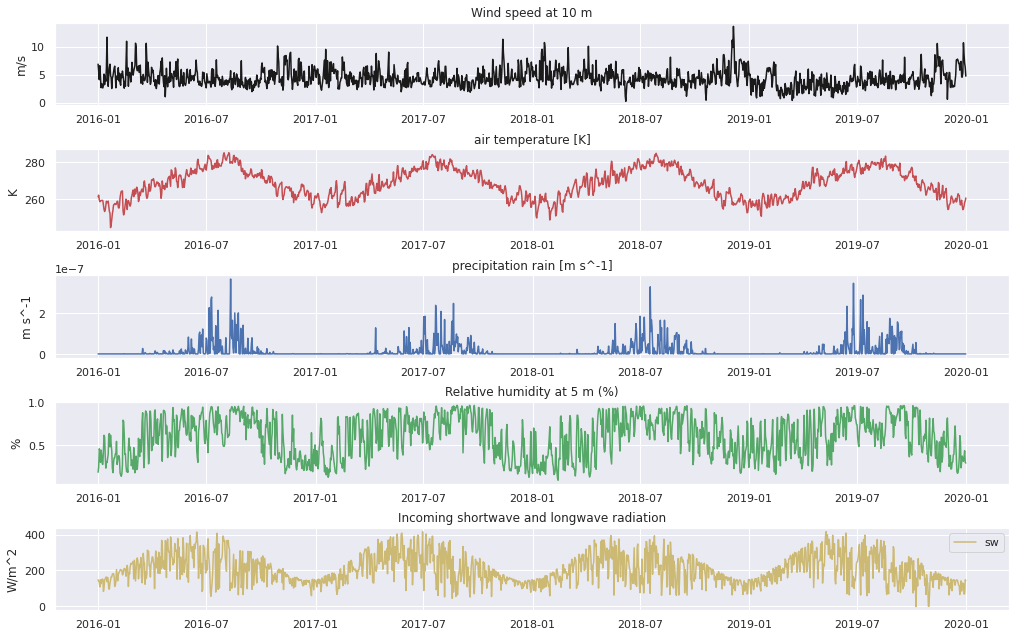

In [98]:
fig2 = plt.figure(figsize=(14,10), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=6, figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
#f2_ax6 = fig2.add_subplot(spec2[5, 0])

f2_ax1.set_title('Wind speed at 10 m')
f2_ax1.plot(data_AWS_input_final['Wind speed at 10 m (m/s)'],'k', label='Wind speed at 10 m (m/s)')
f2_ax1.set_ylabel('m/s')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax1.grid(True)

f2_ax2.set_title('air temperature [K]')
f2_ax2.plot(data_AWS_input_final['air temperature [K]'], 'r',label='air temperature [K]')
f2_ax2.set_ylabel('K')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax2.grid(True)

f2_ax3.set_title('precipitation rain [m s^-1]')
f2_ax3.plot(data_AWS_input_final['precipitation rain [m s^-1]'], 'b',label='precipitation rain [m s^-1]')
f2_ax3.set_ylabel('m s^-1')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax3.grid(True)

f2_ax4.set_title('Relative humidity at 5 m (%)')
f2_ax4.plot(data_AWS_input_final['Relative humidity at 5 m (%)'], 'g',label='Relative humidity at 5 m (%)')
f2_ax4.set_ylabel('%')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax4.grid(True)

f2_ax5.set_title('Incoming shortwave and longwave radiation')
#f2_ax5.plot(data_AWS_input_final['Incoming longwave radiation (W/m^2)'], 'k',label='lw')
f2_ax5.plot(data_AWS_input_final['Incoming shortwave radiation (W/m^2)'], 'y',label='sw')
f2_ax5.set_ylabel('W/m^2')
#f2_ax1.set_xlabel('Date')
f2_ax5.legend()
f2_ax5.grid(True)


In [99]:
data_AWS_input_final = data_AWS_input_final[['air temperature [K]','Wind speed at 10 m (m/s)','precipitation rain [m s^-1]','Relative humidity at 5 m (%)','Incoming shortwave radiation (W/m^2)']]
data_AWS_input_final.head()

air temperature [K]  Wind speed at 10 m (m/s)  \
TIMESTAMP                                                   
2016-01-01           261.261562                  6.880639   
2016-01-02           262.118340                  5.634090   
2016-01-03           259.703889                  4.129521   
2016-01-04           258.583056                  6.604604   
2016-01-05           259.050764                  4.566090   

            precipitation rain [m s^-1]  Relative humidity at 5 m (%)  \
TIMESTAMP                                                               
2016-01-01                          0.0                      0.181419   
2016-01-02                          0.0                      0.243579   
2016-01-03                          0.0                      0.456374   
2016-01-04                          0.0                      0.434167   
2016-01-05                          0.0                      0.298974   

            Incoming shortwave radiation (W/m^2)  
TIMESTAMP                                         
2016-01-01                            147.702618  
2016-01-02                            140.529160  
2016-01-03                            135.256493  
2016-01-04                            107.868264  
2016-01-05                            148.488174

In [56]:
### Saving it as an excel sheet
#data_input_2017_final.to_excel('input_data_env_variables.xlsx')

In [57]:
### Saving it as an h5 file - not the write way!
#data_input_2017_final.to_hdf('input_data_2017.h5', key='df', mode='w')

In [58]:
#pd.read_hdf('input_data_2017.h5','df')

### Snow data
##### Following steps based on Jupyter Notebook - /home/rk/ats_rk/testing/ats-demos/rk_model/Data/Data_Yakou/Yakou_snow_station/Yakou_snow_station.ipynb

In [100]:
### Reading the data
df_snow_depth = pd.read_excel('/home/rk/ats_rk/testing/ats-demos/rk_model/Data/Data_Yakou/Yakou_snow_station/Yakou snow station/Yakou.SnowDepth.2014-2017.xlsx',index_col=0,parse_dates=True)  

df_SWE = pd.read_excel('/home/rk/ats_rk/testing/ats-demos/rk_model/Data/Data_Yakou/Yakou_snow_station/Yakou snow station/Yakou.SnowWaterEquivalent.2014-2017.xlsx',index_col=0,parse_dates=True) 

df_snow_depth.head()

SnowDepth(m)
DATE                    
2014-01-01           0.0
2014-01-02           0.0
2014-01-03           0.0
2014-01-04           0.0
2014-01-05           0.0

In [101]:
### Joining the Date and Time
# https://www.codegrepper.com/code-examples/python/dataframe+combine+date+and+time+columns

df_SWE_syn = df_SWE.copy()
df_SWE_syn.index = pd.to_datetime(df_SWE.index.astype(str)+ ' ' + df_SWE.TIME.astype(str))

df_SWE_syn = df_SWE_syn.drop('TIME',axis=1)

type(df_SWE_syn.index)

pandas.core.indexes.datetimes.DatetimeIndex

### 2. Dealing with NaN, Erroneous, and missing data

#### 2.a. Data has -6999 values for missing data - hence replacing -6999 with NaN values

In [102]:
df_SWE_syn = df_SWE_syn.replace(-6999,None)

df_SnowDepth_syn = df_snow_depth.copy()

df_SnowDepth_syn = df_SnowDepth_syn.replace(-6999, None)

df_SnowDepth_syn.head()

SnowDepth(m)
DATE                    
2014-01-01           0.0
2014-01-02           0.0
2014-01-03           0.0
2014-01-04           0.0
2014-01-05           0.0

In [103]:
### Check for NaN values - Snow depth
df_SnowDepth_syn.index[np.where(np.isnan(df_SnowDepth_syn))[0]]

DatetimeIndex(['2015-03-21', '2015-03-22', '2015-03-23', '2015-03-30',
               '2015-03-31', '2015-05-25', '2015-05-26', '2015-05-27',
               '2015-05-28', '2015-05-29',
               ...
               '2017-11-15', '2017-11-16', '2017-11-17', '2017-11-18',
               '2017-11-19', '2017-11-20', '2017-11-21', '2017-11-22',
               '2017-11-23', '2017-11-24'],
              dtype='datetime64[ns]', name='DATE', length=108, freq=None)

**Comments**:
* It has a total of 108 missing values! - Crazy idea - Due to the relationship of snow depth and SWE, Can we back-calculate the Snow depth using SWE at locations where SWE is missing?

In [104]:
### Check for NaN values - Snow Water Equivalent
df_SWE_syn.index[np.where(np.isnan(df_SWE_syn))[0]]

DatetimeIndex([], dtype='datetime64[ns]', freq=None)

**Comments**:
* It has no missing values! - Wth - What is wrong?

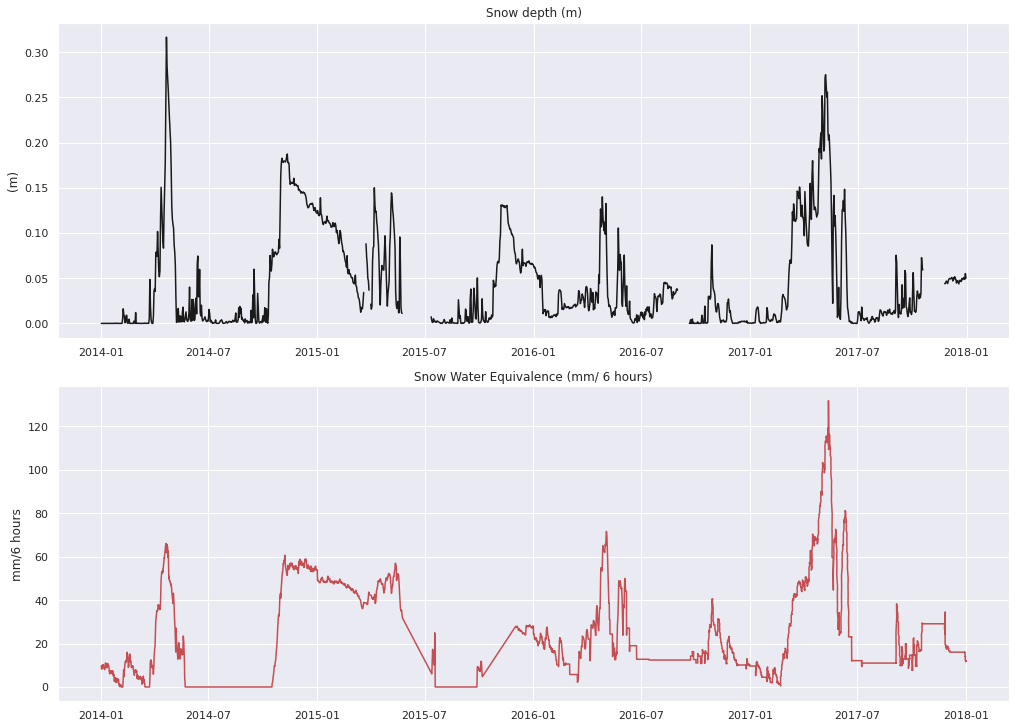

In [105]:
#### Plotting the Snow depth and Snow Water Equivalence

fig2 = plt.figure(figsize=(14,10), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=2, figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])


f2_ax1.set_title('Snow depth (m)')
f2_ax1.plot(df_SnowDepth_syn['SnowDepth(m)'],'k')
f2_ax1.set_ylabel('(m)')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax1.grid(True)

f2_ax2.set_title('Snow Water Equivalence (mm/ 6 hours)')
f2_ax2.plot(df_SWE_syn['SWE(mm)'], 'r')
f2_ax2.set_ylabel('mm/6 hours')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax2.grid(True)



Comments:

    - The Snow depth looks okay - with 108 missing values (Consider SWE where Snow depth is not present!)
    
    - The SWE value according to the above plot and the figure shown in the article - does not show the missing values. The values have probably been interpolated between the range of missing values.
    

- Please observe - It appears that the missing values have not been taken into consideration within the time series 6th Month not present - Add as NaN value!

- Can we consider an average or cumulative value for each day? - We can take the average as this dataset was also validated for snow depth (Please check section 3.2.2 and Figure 4 c)

### 3. Resampling the data to daily mean values

In [106]:
df_SWE_syn = df_SWE_syn.resample('D').mean()

df_SWE_syn.head()

SWE(mm)
2014-01-01    8.750
2014-01-02    9.200
2014-01-03   10.075
2014-01-04    9.750
2014-01-05    8.775

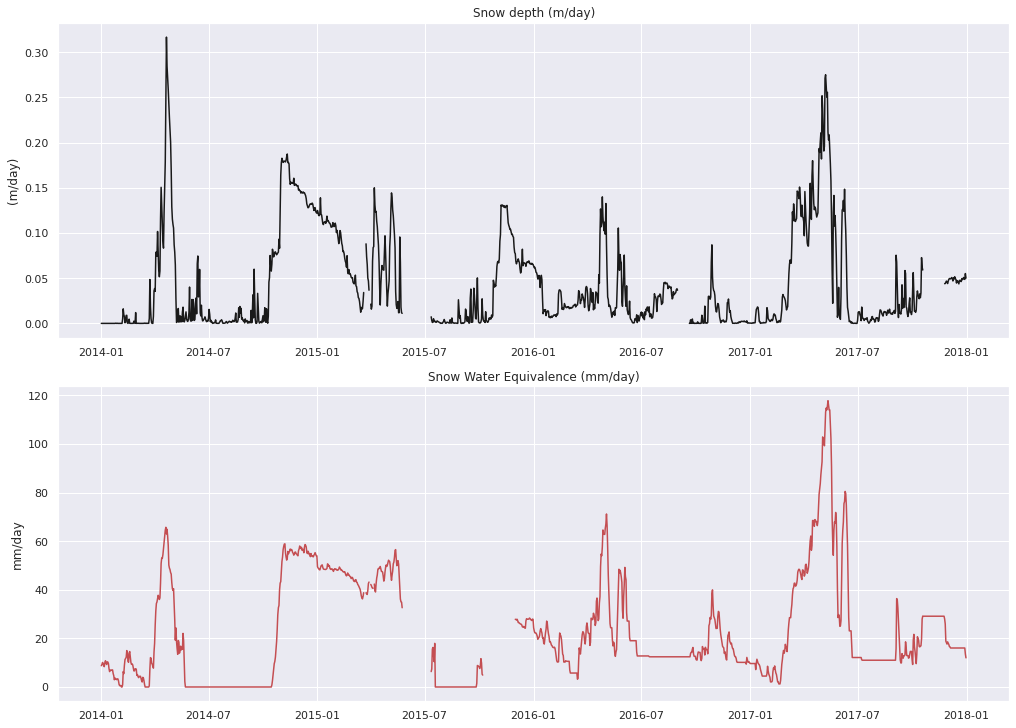

In [107]:
#### Plotting the Snow depth and Snow Water Equivalence once more

fig2 = plt.figure(figsize=(14,10), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=2, figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])


f2_ax1.set_title('Snow depth (m/day)')
f2_ax1.plot(df_SnowDepth_syn['SnowDepth(m)'],'k')
f2_ax1.set_ylabel('(m/day)')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax1.grid(True)

f2_ax2.set_title('Snow Water Equivalence (mm/day)')
f2_ax2.plot(df_SWE_syn['SWE(mm)'], 'r')
f2_ax2.set_ylabel('mm/day')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax2.grid(True)


#### Calculating the snow density from Snow depth and SWE

#### To define the SWE, the following file was considered: http://webarchiv.ethz.ch/arolla/Arolla_Data/SnowConditions/depth_to_swe.pdf

Snow water equivalent is the water content obtained from melting a sample of snow. Density is defined as the ratio of mass per unit volume. Since the mass of the sample is the same whether it is snow or water, the relationship can be expressed using the respective densities and volumes. 

Let $V_{snow}$ = the volume of the snow in the sample, $\rho_{snow}$ = the density of the snow in the sample, V_{water} = the volume of the water when the sample is melted, $\rho_{water}$ = the density of water.

Since the mass of the sample in snow and water remains the same:

$$ m_{water}  = m_{snow}$$

$$ \rho_{water} V_{water} = \rho_{snow} V_{snow} $$

Here, if the Area (A) is constant for both water and snow (it is!), then the $V_{water} = A * SWE$ and $V_{snow} = A * Z_s$ where SWE is the snow water equivalent, $Z_s$ is the depth of snow. We can now write the equation as

$$ \rho_{water} * A * SWE = \rho_{snow} * A * Z_s$$

Finally we have the equation:

$$  SWE = \frac{\rho_{snow} * Z_s}{\rho_{water}} $$

Here we also need the SWE in $m s^{-1}$ --> $Z_s$ is in m/day. $\rho_{water} = 1000 \frac{kg}{m^3}$, $\rho_{snow} = 1000 \frac{kg}{m^3}$. 

Based on the link - https://www.sciencelearn.org.nz/resources/1391-snow-and-ice-density, and Atchley article 2015. Assuming a average snow density between 50 - 1000 $\frac{kg}{m^3}$

Ex: $$ SWE (m s^{-1}) = \frac{450 * Z_s}{1000*86400} = 5.208E-06 * Z_s $$

In [108]:
df_snow = df_snow_depth.copy()
df_snow['SWE(mm)'] = df_SWE_syn['SWE(mm)']

df_snow['SWE(m)'] = df_SWE_syn['SWE(mm)']/1000

# Snow density = (SWE / Snow depth) * Density of water

df_snow['snow_density'] = (df_snow['SWE(m)']/df_snow['SnowDepth(m)'])*1000

# When the Snow depth is 0, then the snow_density = infinity, hence we are replacing inf with nan values
df_snow.replace(np.inf,np.nan,inplace=True)

* Comments:
    - Unreasonable snow density values at some points - But at most of the points, the snow_density ranges from 0 - 1000 kg/m3 - Conduct a thorough analysis of how to calculate snow density
    - Which data is accuarate? Snow depth or SWE?

In [109]:
df_snow[df_snow['snow_density'] > 1000]

SnowDepth(m)    SWE(mm)    SWE(m)   snow_density
DATE                                                        
2014-01-07      0.000021  10.000000  0.010000  480769.230769
2014-01-16      0.000104   6.900000  0.006900   66239.788033
2014-01-23      0.000063   2.975000  0.002975   47600.000000
2014-01-25      0.000188   3.225000  0.003225   17200.000000
2014-01-26      0.000167   3.200000  0.003200   19199.961600
...                  ...        ...       ...            ...
2017-09-28      0.012208  14.637443  0.014637    1198.971496
2017-09-29      0.012542  14.637443  0.014637    1167.105081
2017-09-30      0.009750  14.637443  0.014637    1501.276234
2017-10-05      0.013458  16.522692  0.016523    1227.692322
2017-10-06      0.013583  14.715671  0.014716    1083.362312

[379 rows x 4 columns]

#### There are 379 values that have snow density above a 1000 - Are these datasets reliable?

(array([[0.00800131, 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.00800131, 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.00800131, 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.00209093, 0.00022303, 0.00136608, 0.00195154, 0.00087355,
         0.00056688, 0.00047395, 0.00045536]]),
 array([  0.        , 124.97952493, 249.95904986, 374.93857479,
        499.91809971, 624.89762464, 749.87714957, 874.8566745 ,
        999.83619943]),
 <a list of 4 BarContainer objects>)

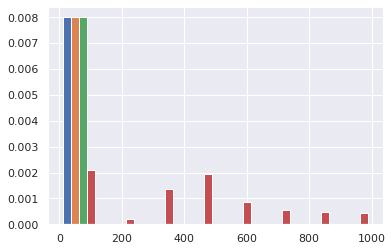

In [110]:
# PLotting a histogram with values below 1000
#bins = round(df_snow[df_snow['snow_density'] < 1000].max() - df_snow[df_snow['snow_density'] < 1000].min())
plt.hist(df_snow[df_snow['snow_density'] < 1000],density=True,bins=8)

In [111]:
df_snow[df_snow['snow_density'] < 1000].describe()

SnowDepth(m)     SWE(mm)      SWE(m)  snow_density
count    861.000000  861.000000  861.000000    861.000000
mean       0.060043   25.628765    0.025629    376.751114
std        0.058514   24.852890    0.024853    280.142549
min        0.000021    0.000000    0.000000      0.000000
25%        0.012333    0.000000    0.000000      0.000000
50%        0.043937   16.656729    0.016657    390.965071
75%        0.100771   47.246325    0.047246    549.557174
max        0.316766  117.770000    0.117770    999.836199

In [112]:
df_snow['SWE(m/s)'] = df_snow['SWE(m)']/86400
df_snow['SWE(m/s)_sd045'] = (df_snow['SnowDepth(m)']*0.45)/86400
df_snow['SWE(m/s)_sd015'] = (df_snow['SnowDepth(m)']*0.15)/86400
df_snow['SWE(m/s)_sd090'] = (df_snow['SnowDepth(m)']*0.90)/86400
df_snow.head()

SnowDepth(m)  SWE(mm)    SWE(m)  snow_density      SWE(m/s)  \
DATE                                                                      
2014-01-01           0.0    8.750  0.008750           NaN  1.012731e-07   
2014-01-02           0.0    9.200  0.009200           NaN  1.064815e-07   
2014-01-03           0.0   10.075  0.010075           NaN  1.166088e-07   
2014-01-04           0.0    9.750  0.009750           NaN  1.128472e-07   
2014-01-05           0.0    8.775  0.008775           NaN  1.015625e-07   

            SWE(m/s)_sd045  SWE(m/s)_sd015  SWE(m/s)_sd090  
DATE                                                        
2014-01-01             0.0             0.0             0.0  
2014-01-02             0.0             0.0             0.0  
2014-01-03             0.0             0.0             0.0  
2014-01-04             0.0             0.0             0.0  
2014-01-05             0.0             0.0             0.0

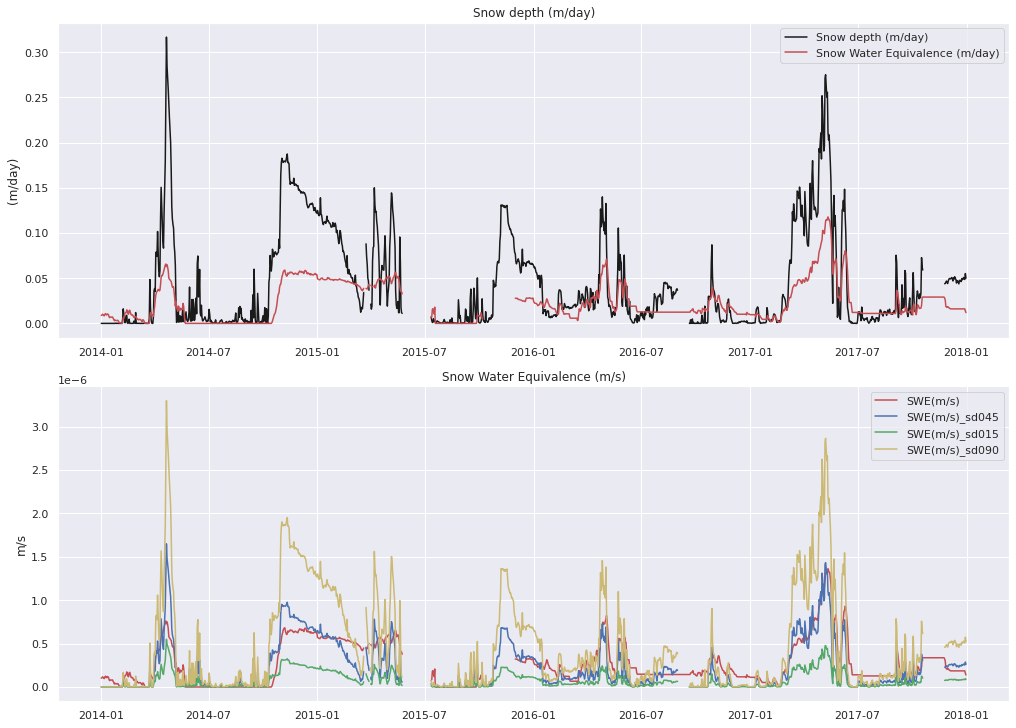

In [113]:
#### Plotting all the values:

#### Plotting the Snow depth and Snow Water Equivalence once more

fig2 = plt.figure(figsize=(14,10), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=2, figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])


f2_ax1.set_title('Snow depth (m/day)')
f2_ax1.plot(df_snow['SnowDepth(m)'],'k',label='Snow depth (m/day)')
f2_ax1.plot(df_snow['SWE(m)'], 'r',label='Snow Water Equivalence (m/day)')
f2_ax1.set_ylabel('(m/day)')
#f2_ax1.set_xlabel('Date')
f2_ax1.legend()
f2_ax1.grid(True)

f2_ax2.set_title('Snow Water Equivalence (m/s)')
f2_ax2.plot(df_snow['SWE(m/s)'], 'r',label='SWE(m/s)')
f2_ax2.plot(df_snow['SWE(m/s)_sd045'], 'b',label='SWE(m/s)_sd045')
f2_ax2.plot(df_snow['SWE(m/s)_sd015'], 'g',label='SWE(m/s)_sd015')
f2_ax2.plot(df_snow['SWE(m/s)_sd090'], 'y',label='SWE(m/s)_sd090')
f2_ax2.set_ylabel('m/s')
#f2_ax1.set_xlabel('Date')
f2_ax2.legend()
f2_ax2.grid(True)

#### SWE can also be used directly instead of snow depth. The snow density value seems to be around 450 kg/m3
- Can we use SWE calculated from snow depth at locations where snow depth is not available?

#### Consider using SWE

In [114]:
df_snow['SWE(m/s)']

DATE
2014-01-01    1.012731e-07
2014-01-02    1.064815e-07
2014-01-03    1.166088e-07
2014-01-04    1.128472e-07
2014-01-05    1.015625e-07
                  ...     
2017-12-27    1.856281e-07
2017-12-28    1.856281e-07
2017-12-29    1.856281e-07
2017-12-30    1.567794e-07
2017-12-31    1.387082e-07
Name: SWE(m/s), Length: 1461, dtype: float64

#### Replace the missing values of SWE with Snow depth calculated snow density (450 kg/m3)

In [115]:
### Check for NaN values
df_snow['SWE(m/s)'].index[np.where(np.isnan(df_snow['SWE(m/s)']))[0]]

DatetimeIndex(['2015-03-21', '2015-03-22', '2015-03-23', '2015-03-30',
               '2015-03-31', '2015-04-06', '2015-05-25', '2015-05-26',
               '2015-05-27', '2015-05-28',
               ...
               '2015-11-21', '2015-11-22', '2015-11-23', '2015-11-24',
               '2015-11-25', '2015-11-26', '2015-11-27', '2015-11-28',
               '2015-11-29', '2015-11-30'],
              dtype='datetime64[ns]', name='DATE', length=108, freq=None)

In [116]:
### Replacing the NaN values of snow water equivalence with SWE calculated for sd_045

df_snow['SWE(m/s)_mv'] = df_snow['SWE(m/s)']

#df_snow['SWE(m/s)_mv'] = np.where(df_snow['SWE(m/s)_mv'] == np.nan, df_snow['SWE(m/s)_sd045'])

#df_snow['SWE(m/s)_mv'].fillna(df_snow['SWE(m/s)_sd045']).index[np.where(np.isnan(df_snow['SWE(m/s)']))[0]]
df_snow['SWE(m/s)_mv'].fillna(df_snow['SWE(m/s)_sd045'],inplace=True)

### Check for NaN values
df_snow['SWE(m/s)_mv'].index[np.where(np.isnan(df_snow['SWE(m/s)_mv']))[0]]

DatetimeIndex(['2015-03-21', '2015-03-22', '2015-03-23', '2015-03-30',
               '2015-03-31', '2015-05-25', '2015-05-26', '2015-05-27',
               '2015-05-28', '2015-05-29', '2015-05-30', '2015-05-31',
               '2015-06-01', '2015-06-02', '2015-06-03', '2015-06-04',
               '2015-06-05', '2015-06-06', '2015-06-07', '2015-06-08',
               '2015-06-09', '2015-06-10', '2015-06-11', '2015-06-12',
               '2015-06-13', '2015-06-14', '2015-06-15', '2015-06-16',
               '2015-06-17', '2015-06-18', '2015-06-19', '2015-06-20',
               '2015-06-21', '2015-06-22', '2015-06-23', '2015-06-24',
               '2015-06-25', '2015-06-26', '2015-06-27', '2015-06-28',
               '2015-06-29', '2015-06-30', '2015-07-01', '2015-07-02',
               '2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10',
               '2015-07-11'],
              dtype='datetime64[ns]', name='DAT

Comments:

    * Most of the missing values lie in 2015 - A year not to consider!
    
    * The missing values that has occured from data points - 2015-05-25 : 2015-07-11 (Largest group of missing values!) - It will have an impact on the simulations be careful!
    
    * These missing values can be dealt with by either replacing with 0 values or interpolating between the points - Try both! 

In [117]:
# Interpolation method first
df_snow['SWE(m/s)_mv_int'] = df_snow['SWE(m/s)_mv'].copy()
df_snow['SWE(m/s)_mv_int'].interpolate(method='linear',limit_direction='forward',axis=0,inplace=True)

# Filling NaN values with 0 during 2015-06-01 : 2015-07-11 (and the rest of the values by interpolation?)
df_snow['SWE(m/s)_mv_0'] = df_snow['SWE(m/s)_mv'].copy()
#df_snow['SWE(m/s)_mv_0']['2015-03'].interpolate(method='linear',inplace=True)

df_snow['SWE(m/s)_mv_0'].replace(np.nan, 0,inplace=True)

In [118]:
# Replacing the missing values of Snow depth dataset (2017) with the interpolated SWE values

df_snow['SWE(m/s)_sd045'].fillna(df_snow['SWE(m/s)_mv_int'],inplace=True)

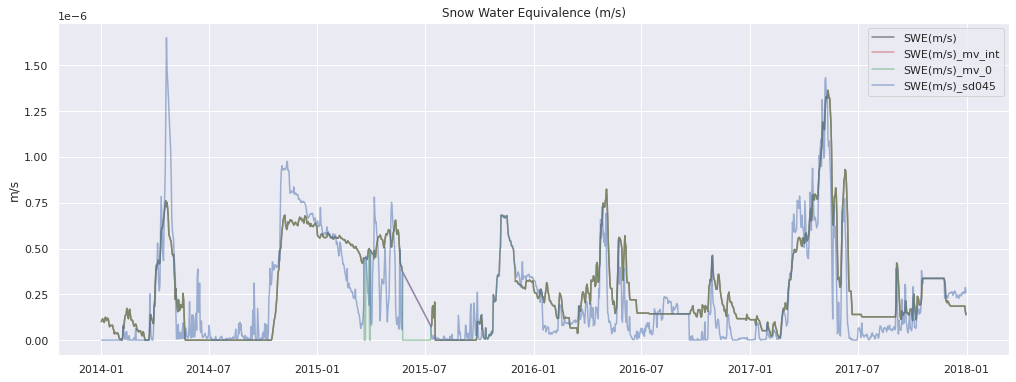

In [119]:
#### Plotting the values

#### Plotting the Snow depth and Snow Water Equivalent once more

fig2 = plt.figure(figsize=(14,10), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=2, figure=fig2)
f2_ax2 = fig2.add_subplot(spec2[0, 0])


f2_ax2.set_title('Snow Water Equivalence (m/s)')
f2_ax2.plot(df_snow['SWE(m/s)'], 'k',alpha=0.5,label='SWE(m/s)')
f2_ax2.plot(df_snow['SWE(m/s)_mv_int'], 'r',alpha=0.5, label='SWE(m/s)_mv_int')
f2_ax2.plot(df_snow['SWE(m/s)_mv_0'], 'g', alpha=0.5,label='SWE(m/s)_mv_0')
f2_ax2.plot(df_snow['SWE(m/s)_sd045'], 'b',alpha=0.5,label='SWE(m/s)_sd045')
#f2_ax2.plot(df_snow['SWE(m/s)_sd015'], 'g',label='SWE(m/s)_sd015')
#f2_ax2.plot(df_snow['SWE(m/s)_sd090'], 'y',label='SWE(m/s)_sd090')
f2_ax2.set_ylabel('m/s')
#f2_ax1.set_xlabel('Date')
f2_ax2.legend()
f2_ax2.grid(True)

In [120]:
### Check for NaN values once more!
df_snow['SWE(m/s)_mv_int'].index[np.where(np.isnan(df_snow['SWE(m/s)_mv_int']))[0]]

DatetimeIndex([], dtype='datetime64[ns]', name='DATE', freq=None)

In [121]:
### Check for NaN values once more!
df_snow['SWE(m/s)_mv_0'].index[np.where(np.isnan(df_snow['SWE(m/s)_mv_0']))[0]]

DatetimeIndex([], dtype='datetime64[ns]', name='DATE', freq=None)

In [122]:
### Check for NaN values once more!
df_snow['SWE(m/s)_sd045'].index[np.where(np.isnan(df_snow['SWE(m/s)_sd045']))[0]]

DatetimeIndex([], dtype='datetime64[ns]', name='DATE', freq=None)

### Considering a reducted dataset:
* Calibration: 2016
* Validation: 2017

In [130]:
data_AWS_input_Case5.loc[:,'SWE(m/s)_sd045']

TIMESTAMP
2016-01-01    3.299696e-07
2016-01-02    3.208550e-07
2016-01-03    3.236762e-07
2016-01-04    3.126085e-07
2016-01-05    2.951389e-07
                  ...     
2017-12-27    2.644314e-07
2017-12-28    2.555339e-07
2017-12-29    2.533245e-07
2017-12-30    2.871528e-07
2017-12-31    2.608173e-07
Freq: D, Name: SWE(m/s)_sd045, Length: 731, dtype: float64

In [133]:
data_AWS_input_Case5 = data_AWS_input_final['2016':'2017']
data_AWS_input_Case5['SWE(m/s)_sd045'] = df_snow.loc[:,'SWE(m/s)_sd045']['2016':'2017']

data_AWS_input_Case5.head()

<ipython-input-133-1ddfb53889ec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_AWS_input_Case5['SWE(m/s)_sd045'] = df_snow.loc[:,'SWE(m/s)_sd045']['2016':'2017']


air temperature [K]  Wind speed at 10 m (m/s)  \
TIMESTAMP                                                   
2016-01-01           261.261562                  6.880639   
2016-01-02           262.118340                  5.634090   
2016-01-03           259.703889                  4.129521   
2016-01-04           258.583056                  6.604604   
2016-01-05           259.050764                  4.566090   

            precipitation rain [m s^-1]  Relative humidity at 5 m (%)  \
TIMESTAMP                                                               
2016-01-01                          0.0                      0.181419   
2016-01-02                          0.0                      0.243579   
2016-01-03                          0.0                      0.456374   
2016-01-04                          0.0                      0.434167   
2016-01-05                          0.0                      0.298974   

            Incoming shortwave radiation (W/m^2)  SWE(m/s)_sd045  
TIMESTAMP                                                         
2016-01-01                            147.702618    3.299696e-07  
2016-01-02                            140.529160    3.208550e-07  
2016-01-03                            135.256493    3.236762e-07  
2016-01-04                            107.868264    3.126085e-07  
2016-01-05                            148.488174    2.951389e-07

In [135]:
### Check for NaN values once more!
data_AWS_input_Case5.index[np.where(np.isnan(data_AWS_input_Case5))[0]]

DatetimeIndex([], dtype='datetime64[ns]', name='TIMESTAMP', freq=None)

In [ ]:
### Plotting the dataset

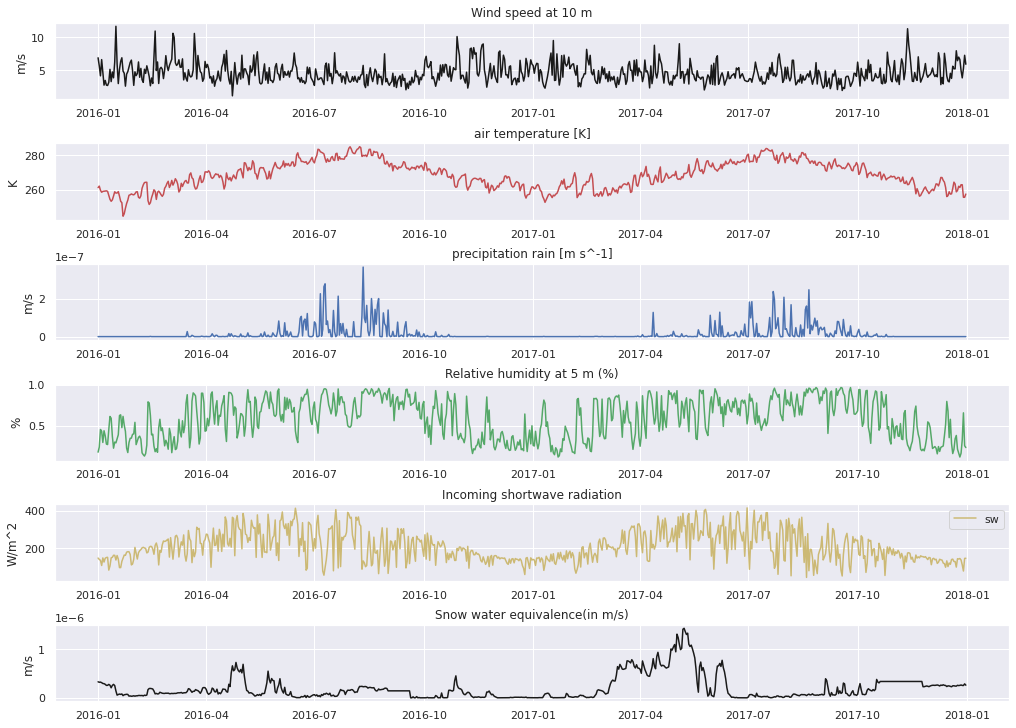

In [138]:
fig2 = plt.figure(figsize=(14,10), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=6, figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
f2_ax6 = fig2.add_subplot(spec2[5, 0])

f2_ax1.set_title('Wind speed at 10 m')
f2_ax1.plot(data_AWS_input_Case5['Wind speed at 10 m (m/s)'],'k', label='Wind speed at 10 m (m/s)')
f2_ax1.set_ylabel('m/s')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax1.grid(True)

f2_ax2.set_title('air temperature [K]')
f2_ax2.plot(data_AWS_input_Case5['air temperature [K]'], 'r',label='temp')
f2_ax2.set_ylabel('K')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax2.grid(True)

f2_ax3.set_title('precipitation rain [m s^-1]')
f2_ax3.plot(data_AWS_input_Case5['precipitation rain [m s^-1]'], 'b',label='ppt')
f2_ax3.set_ylabel('m/s')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax3.grid(True)

f2_ax4.set_title('Relative humidity at 5 m (%)')
f2_ax4.plot(data_AWS_input_Case5['Relative humidity at 5 m (%)'], 'g',label='rh')
f2_ax4.set_ylabel('%')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax4.grid(True)

f2_ax5.set_title('Incoming shortwave radiation')
#f2_ax5.plot(data_AWS_syn_input['Incoming longwave radiation (W/m^2)'], 'k',label='lw')
f2_ax5.plot(data_AWS_input_Case5['Incoming shortwave radiation (W/m^2)'], 'y',label='sw')
f2_ax5.set_ylabel('W/m^2')
#f2_ax1.set_xlabel('Date')
f2_ax5.legend()
f2_ax5.grid(True)

f2_ax6.set_title('Snow water equivalence(in m/s)')
f2_ax6.plot(data_AWS_input_Case5['SWE(m/s)_sd045'], 'k',label='SWE_m/s')
f2_ax6.set_ylabel('m/s')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax6.grid(True)

### Calibration dataset (2016)
 

In [197]:
data_AWS_input_Case5_calib = data_AWS_input_Case5.loc['2016']

In [198]:
# Opening the input file
hf_input = h5py.File('Final_InputData_Case5/Calib_data_Case5_2016.h5','w')

In [199]:
len(data_AWS_input_Case5_calib)

366

In [200]:
# Creating a variable with time instances for 1096 days
no_days = len(data_AWS_input_Case5_calib) # Total number of days
no_secs_day = 86400 # Total number of seconds in a day
times = np.arange(0,no_days*no_secs_day,no_secs_day)
len(times)

366

In [201]:
data_AWS_input_Case5_calib.columns

Index(['air temperature [K]', 'Wind speed at 10 m (m/s)',
       'precipitation rain [m s^-1]', 'Relative humidity at 5 m (%)',
       'Incoming shortwave radiation (W/m^2)', 'SWE(m/s)_sd045'],
      dtype='object')

In [202]:
# Changing the storage to numpy array
hf_input.create_dataset('time [s]', data=times)
hf_input.create_dataset('air temperature [K]', data=data_AWS_input_Case5_calib['air temperature [K]'].values)
hf_input.create_dataset('Wind speed at 10 m (m/s)', data=data_AWS_input_Case5_calib['Wind speed at 10 m (m/s)'].values)
hf_input.create_dataset('precipitation rain [m s^-1]', data=data_AWS_input_Case5_calib['precipitation rain [m s^-1]'].values)
hf_input.create_dataset('Relative humidity at 5 m (%)', data=data_AWS_input_Case5_calib['Relative humidity at 5 m (%)'].values)
hf_input.create_dataset('Incoming shortwave radiation (W/m^2)', data=data_AWS_input_Case5_calib['Incoming shortwave radiation (W/m^2)'].values)
hf_input.create_dataset('Snow water equivalence (m/s)_sd045', data=data_AWS_input_Case5_calib['SWE(m/s)_sd045'].values)

<HDF5 dataset "s)_sd045": shape (366,), type "<f8">

In [203]:
hf_input.close()

In [204]:
### Reading the file once more to check
### Extracting the data from the example 'column_data.h5'.  
with h5py.File(f'Final_InputData_Case5/Calib_data_Case5_2016.h5','r') as hdf:
    ls = list(hdf.keys())
    print('List of datasets in this file: \n \n', ls)
    print('\n')
    print(np.array(hdf.get('Snow water equivalence (m/s)_sd045')))
    #print(len(np.array(hdf.get('air temperature [K]'))))

    #temperature_column = np.array(hdf.get('temperature.cell.0/1600'))

List of datasets in this file: 
 
 ['Incoming shortwave radiation (W', 'Relative humidity at 5 m (%)', 'Snow water equivalence (m', 'Wind speed at 10 m (m', 'air temperature [K]', 'precipitation rain [m s^-1]', 'time [s]']


[3.29969620e-07 3.20855036e-07 3.23676214e-07 3.12608505e-07
 2.95138891e-07 2.91883682e-07 2.78320312e-07 2.55859375e-07
 2.57378474e-07 2.76475693e-07 2.59548609e-07 2.06814234e-07
 2.55859375e-07 2.77126734e-07 2.51627604e-07 1.41927083e-07
 5.56640625e-08 6.81423594e-08 7.77994792e-08 7.07465260e-08
 7.94270833e-08 4.49218750e-08 6.32595469e-08 6.72743073e-08
 7.28081615e-08 6.97699635e-08 3.52647552e-08 3.88454844e-08
 3.23350677e-08 3.56987865e-08 4.17751719e-08 3.41796875e-08
 4.11241302e-08 4.17751719e-08 4.81770833e-08 4.83940990e-08
 4.57899323e-08 4.88281250e-08 3.90625000e-08 5.45789948e-08
 4.83940990e-08 5.72916667e-08 1.68619792e-07 1.91948786e-07
 1.93250870e-07 1.89127604e-07 1.81857641e-07 1.40516495e-07
 8.12278385e-08 9.09288177e-08 7.96440990e-

### Validation dataset (2017)
 

In [205]:
data_AWS_input_Case5_valid = data_AWS_input_Case5.loc['2017']

In [207]:
data_AWS_input_Case5_valid.index

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05', '2017-01-06', '2017-01-07', '2017-01-08',
               '2017-01-09', '2017-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='TIMESTAMP', length=365, freq='D')

In [208]:
# Opening the input file
hf_input = h5py.File('Final_InputData_Case5/Valid_data_Case5_2017.h5','w')

In [209]:
len(data_AWS_input_Case5_valid)

365

In [210]:
# Creating a variable with time instances for 1096 days
no_days = len(data_AWS_input_Case5_valid) # Total number of days
no_secs_day = 86400 # Total number of seconds in a day
times = np.arange(0,no_days*no_secs_day,no_secs_day)
len(times)

365

In [211]:
data_AWS_input_Case5_valid.columns

Index(['air temperature [K]', 'Wind speed at 10 m (m/s)',
       'precipitation rain [m s^-1]', 'Relative humidity at 5 m (%)',
       'Incoming shortwave radiation (W/m^2)', 'SWE(m/s)_sd045'],
      dtype='object')

In [212]:
# Changing the storage to numpy array
hf_input.create_dataset('time [s]', data=times)
hf_input.create_dataset('air temperature [K]', data=data_AWS_input_Case5_valid['air temperature [K]'].values)
hf_input.create_dataset('Wind speed at 10 m (m/s)', data=data_AWS_input_Case5_valid['Wind speed at 10 m (m/s)'].values)
hf_input.create_dataset('precipitation rain [m s^-1]', data=data_AWS_input_Case5_valid['precipitation rain [m s^-1]'].values)
hf_input.create_dataset('Relative humidity at 5 m (%)', data=data_AWS_input_Case5_valid['Relative humidity at 5 m (%)'].values)
hf_input.create_dataset('Incoming shortwave radiation (W/m^2)', data=data_AWS_input_Case5_valid['Incoming shortwave radiation (W/m^2)'].values)
hf_input.create_dataset('Snow water equivalence (m/s)_sd045', data=data_AWS_input_Case5_valid['SWE(m/s)_sd045'].values)

<HDF5 dataset "s)_sd045": shape (365,), type "<f8">

In [213]:
hf_input.close()

In [215]:
### Reading the file once more to check
### Extracting the data from the example 'column_data.h5'.  
with h5py.File(f'Final_InputData_Case5/Valid_data_Case5_2017.h5','r') as hdf:
    ls = list(hdf.keys())
    print('List of datasets in this file: \n \n', ls)
    print('\n')
    print(np.array(hdf.get('Snow water equivalence (m/s)_sd045')))
    print(len(np.array(hdf.get('air temperature [K]'))))

    #temperature_column = np.array(hdf.get('temperature.cell.0/1600'))

List of datasets in this file: 
 
 ['Incoming shortwave radiation (W', 'Relative humidity at 5 m (%)', 'Snow water equivalence (m', 'Wind speed at 10 m (m', 'air temperature [K]', 'precipitation rain [m s^-1]', 'time [s]']


[1.95312500e-09 1.08506771e-09 6.51041667e-10 2.38715104e-09
 1.30208333e-09 4.23177083e-09 2.82118229e-09 3.58072917e-09
 3.58072917e-09 4.66579844e-08 8.07291667e-08 8.63715260e-08
 9.48350677e-08 9.10373281e-08 5.59895833e-08 1.07421875e-08
 1.09592031e-08 0.00000000e+00 3.08248438e-09 2.27864583e-09
 2.27864583e-09 3.14670312e-09 5.42534896e-09 3.03819271e-09
 3.90625000e-09 4.44878646e-09 3.68923438e-09 1.15017344e-08
 9.04947917e-08 7.25911458e-08 2.61501719e-08 2.26779531e-08
 1.63845469e-08 1.15017344e-08 1.18272552e-08 1.96397552e-08
 2.30034740e-08 1.58420156e-08 2.24609375e-08 4.63324635e-08
 5.51215260e-08 4.51388906e-08 4.80685781e-08 2.79947917e-08
 1.75781250e-08 4.44878646e-09 9.54860937e-09 6.40191146e-09
 1.37803802e-08 1.68185781e-08 7.26996354e-

## Preparing the output dataset (calibration and validation)

In [216]:
# Storing the parameter names
output_param_names = ['Soil moisture at - 0.04 m (%)','Soil moisture at - 0.1 m (%)','Soil moisture at - 0.2 m (%)','Soil moisture at - 0.4 m (%)','Soil moisture at - 0.8 m (%)','Soil moisture at - 1.2 m (%)','Soil moisture at - 1.6 m (%)','Soil temperature at - 0.00 m (°C)','Soil temperature at - 0.04 m (°C)','Soil temperature at - 0.1 m (°C)','Soil temperature at - 0.2 m (°C)','Soil temperature at - 0.4 m (°C)','Soil temperature at - 0.8 m (°C)','Soil temperature at - 1.2 m (°C)','Soil temperature at - 1.6 m (°C)']
output_param_names

['Soil moisture at - 0.04 m (%)',
 'Soil moisture at - 0.1 m (%)',
 'Soil moisture at - 0.2 m (%)',
 'Soil moisture at - 0.4 m (%)',
 'Soil moisture at - 0.8 m (%)',
 'Soil moisture at - 1.2 m (%)',
 'Soil moisture at - 1.6 m (%)',
 'Soil temperature at - 0.00 m (°C)',
 'Soil temperature at - 0.04 m (°C)',
 'Soil temperature at - 0.1 m (°C)',
 'Soil temperature at - 0.2 m (°C)',
 'Soil temperature at - 0.4 m (°C)',
 'Soil temperature at - 0.8 m (°C)',
 'Soil temperature at - 1.2 m (°C)',
 'Soil temperature at - 1.6 m (°C)']

In [218]:
data_AWS_output = data_AWS_syn['2016':'2017'][output_param_names].copy()

### Plotting soil moisture at different depths 

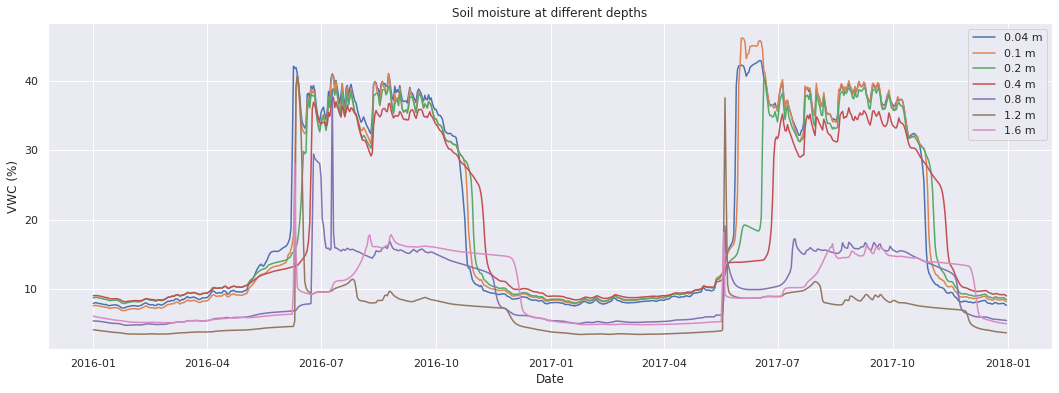

In [219]:
plt.figure(figsize=(18,6))
plt.title('Soil moisture at different depths')
plt.plot(data_AWS_output['Soil moisture at - 0.04 m (%)'], label='0.04 m')
plt.plot(data_AWS_output['Soil moisture at - 0.1 m (%)'], label='0.1 m')
plt.plot(data_AWS_output['Soil moisture at - 0.2 m (%)'], label='0.2 m')
plt.plot(data_AWS_output['Soil moisture at - 0.4 m (%)'], label='0.4 m')
plt.plot(data_AWS_output['Soil moisture at - 0.8 m (%)'], label='0.8 m')
plt.plot(data_AWS_output['Soil moisture at - 1.2 m (%)'], label='1.2 m')
plt.plot(data_AWS_output['Soil moisture at - 1.6 m (%)'], label='1.6 m')


plt.ylabel('VWC (%)')
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.xlabel('Date')
plt.legend()
plt.grid(True)

Comments:
1. Soil moisture decreases with depth - Good!
2. Soil moisture sensors at 0.04 m, 0.1 m, 0.2 m & 0.4 m have similar moisture contents [during the monsoon period] and also higher soil moisture content than at 0.8 m, 1.2 m and 1.6 m. 
3. There seems to be a grouping of soil moisture sensors at 0.04 m, 0.1 m, 0.2 m & 0.4 m  & 0.8 m, 1.2 m and 1.6 m - There probably exist two different layers of soil? - Similar pattern seen at up-slope, middle-slope and riparian zone.
4. Soil moisture content increases during the indian summer monsoons [2019-06 to 2019-11] - Plot it with precipitation?
5. How to identify if soil is frozen? - Seems to be a constant moisture content during the winter period.
6. On observing the yearly trend, the soil moisture content values have more or less similar trends.

### Plotting soil temperature at different depths

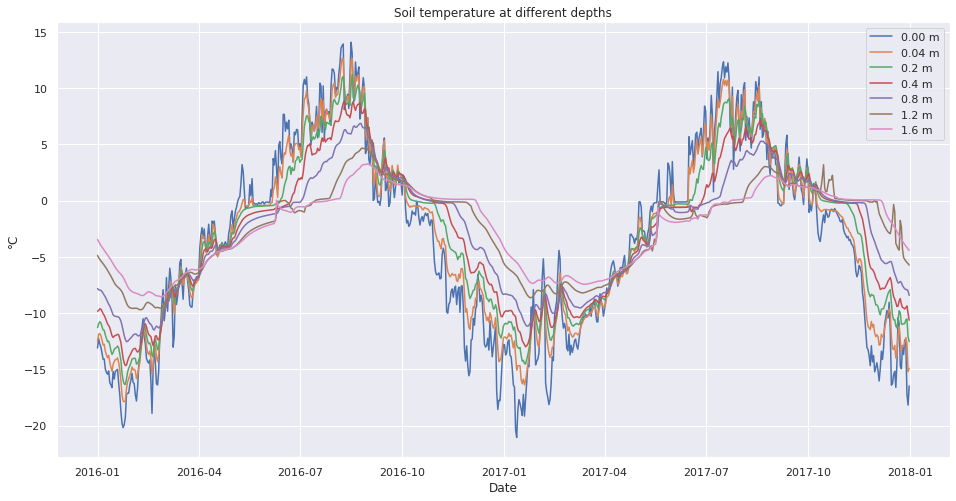

In [220]:
plt.figure(figsize=(16,8))
plt.title('Soil temperature at different depths')
#plt.plot(data_AWS_syn['Air temperature at 5 m (°C)'], label='Air temperature at 5 m')
plt.plot(data_AWS_output['Soil temperature at - 0.00 m (°C)'], label='0.00 m')
plt.plot(data_AWS_output['Soil temperature at - 0.04 m (°C)'], label='0.04 m')
plt.plot(data_AWS_output['Soil temperature at - 0.2 m (°C)'], label='0.2 m')
plt.plot(data_AWS_output['Soil temperature at - 0.4 m (°C)'], label='0.4 m')
plt.plot(data_AWS_output['Soil temperature at - 0.8 m (°C)'], label='0.8 m')
plt.plot(data_AWS_output['Soil temperature at - 1.2 m (°C)'], label='1.2 m')
plt.plot(data_AWS_output['Soil temperature at - 1.6 m (°C)'], label='1.6 m')
plt.ylabel('°C')
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('°Cm-°Cd'))
plt.xlabel('Date')
plt.legend()
plt.grid(True)

Comments:
1. In the winter the surface is cooler than the subsurface (soil at greater depths) & in the summer, the subsurface is cooler than the surface - Good! 
2. The temperature values increases during the summer and decreases during the winter good!
3. The variations of subsurface temperature decreases with depth.
4. On observing the yearly trend, the temperature variations along different depths seem to be similar.

### Dealing with Erroneous and missing data data:

In [221]:
data_AWS_output.index[np.where(np.isnan(data_AWS_output))[0]]

DatetimeIndex([], dtype='datetime64[ns]', name='TIMESTAMP', freq=None)

### No missing or erroneous values??!!

In [223]:
data_AWS_output_calib = data_AWS_output.loc['2016']
data_AWS_output_validate = data_AWS_output.loc['2017']

In [227]:
data_AWS_output_validate.head()

Soil moisture at - 0.04 m (%)  Soil moisture at - 0.1 m (%)  \
TIMESTAMP                                                                 
2017-01-01                       8.001889                      8.352500   
2017-01-02                       8.008944                      8.363681   
2017-01-03                       8.001986                      8.356250   
2017-01-04                       8.016035                      8.365417   
2017-01-05                       8.037118                      8.386875   

            Soil moisture at - 0.2 m (%)  Soil moisture at - 0.4 m (%)  \
TIMESTAMP                                                                
2017-01-01                      8.502500                      8.952083   
2017-01-02                      8.515347                      8.959236   
2017-01-03                      8.513264                      8.958819   
2017-01-04                      8.515694                      8.953472   
2017-01-05                      8.527569                      8.957500   

            Soil moisture at - 0.8 m (%)  Soil moisture at - 1.2 m (%)  \
TIMESTAMP                                                                
2017-01-01                      5.408937                      3.765458   
2017-01-02                      5.403771                      3.747493   
2017-01-03                      5.386264                      3.732201   
2017-01-04                      5.380111                      3.718479   
2017-01-05                      5.374840                      3.706326   

            Soil moisture at - 1.6 m (%)  Soil temperature at - 0.00 m (°C)  \
TIMESTAMP                                                                     
2017-01-01                      5.415479                         -12.807778   
2017-01-02                      5.377924                         -13.721104   
2017-01-03                      5.312049                         -13.513736   
2017-01-04                      5.282632                         -12.564931   
2017-01-05                      5.251993                         -12.385111   

            Soil temperature at - 0.04 m (°C)  \
TIMESTAMP                                       
2017-01-01                         -12.126736   
2017-01-02                         -12.143333   
2017-01-03                         -12.295139   
2017-01-04                         -12.117292   
2017-01-05                         -11.802986   

            Soil temperature at - 0.1 m (°C)  \
TIMESTAMP                                      
2017-01-01                        -11.403750   
2017-01-02                        -11.357708   
2017-01-03                        -11.472361   
2017-01-04                        -11.363750   
2017-01-05                        -11.108819   

            Soil temperature at - 0.2 m (°C)  \
TIMESTAMP                                      
2017-01-01                        -10.977778   
2017-01-02                        -10.903542   
2017-01-03                        -10.965417   
2017-01-04                        -10.923194   
2017-01-05                        -10.740208   

            Soil temperature at - 0.4 m (°C)  \
TIMESTAMP                                      
2017-01-01                         -9.902153   
2017-01-02                         -9.815208   
2017-01-03                         -9.805000   
2017-01-04                         -9.844306   
2017-01-05                         -9.785764   

            Soil temperature at - 0.8 m (°C)  \
TIMESTAMP                                      
2017-01-01                         -8.312083   
2017-01-02                         -8.296667   
2017-01-03                         -8.309931   
2017-01-04                         -8.356181   
2017-01-05                         -8.384167   

            Soil temperature at - 1.2 m (°C)  Soil temperature at - 1.6 m (°C)  
TIMESTAMP                                                                       
2017-01-01                         -5.65

#### Storing the data in a csv file for calibration (pest)

In [224]:
data_AWS_output_calib.to_csv('Final_OutputData_Case5/Calib_outputdata_Case5_2016.csv', sep='\t')
data_AWS_output_validate.to_csv('Final_OutputData_Case5/Valid_outputdata_Case5_2017.csv', sep='\t')